# Mathematics and Multivariate Statistics - Portfolio-Exam

<div class="alert alert-block alert-success">
<b> Task 1- Story 
 </b> 
</div>

### The notebook contains the unsupervised learning on dataset taken from Kaggle called as Effect of Climate Change on Commodities yeilds.

The link of the dataset is : https://www.kaggle.com/datasets/abhisaha97/effect-of-climate-change-on-commodity-yields

The dataset csv File is also included zip folder submitted with this notebook

<div class="alert alert-block alert-info">
Since we know climate change is of the latest concern for our generation as due to many technological enhancements in various sectors ranging from industrial sector to space innovation and exploration sector, we are harming our enviornment with an exponential speed and soon due to these climate changing conditions our food sector will also get affected eventually. 

To study on this case, I have chosen this dataset to observe the impact of climate change on cotton production in different states in India over the span of 8 years from 2007 to 2015. 

After performing the unsupervised learning, basically clustering, it is intended that how the change in climate mainly here rainfall and temperature affects the production in different states, thus taking a similar trend between different states and understanding the dissimiliarity between others. 

Clustering eventually helps us to deal with the problem on a group basis and providing a course of action that can be followed up for implementing solutions to the case. 

Our goal is to observe some trend and the formation of cluster and study how clusters are formed, consitituing what similar properties and how regions are correlated to each other with the span of time. Our main idea will be to somehow find a good cluster pattern which statisfies some facts and figures and understand how harsh the climate change is affecting even a commodity yield.

The project focuses on accurate result and handling the data efficiently with the knowledge of clustering. Since we do not have any result data to look for our cluster correctness, but we will look forward to reach to good cluster based on 2 different cluster methods.

In conclusion, we want to see is temperature and rainfall change really impact the cotton production in India or not over span of years data. 
</div>


This dataset is uploaded on Kaggle by ABHIRUP SAHA. All the credits to the data collection and fromation of this dataset goes to him.




<div class="alert alert-block alert-success">
<b> Task 2- The Data 
 </b> 
</div>

### Importing Essential Dependencies and Packages 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans  
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler  
import time  
from sklearn.metrics import silhouette_samples, silhouette_score  
import warnings
from matplotlib import cm
warnings.filterwarnings("ignore")
from sklearn.cluster import AgglomerativeClustering

### Data Collection and Analysis

In [2]:
# loading the data into pandas dataframe 
cotton_dataframe = pd.read_csv('india_cotton.csv')


In [3]:
# observing first five rows of dataframe
cotton_dataframe.head()

,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,PHOSPHATE SHARE IN NPK (Percent),PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha)
0,2007,Andhra Pradesh,Srikakulam,179.0,124.0,0,0.0,19.53,0.0,18.03,...,24.07,28.28,20.03,NaN,17.46,NaN,15.77,64007.0,134.94,97.83
1,2007,Andhra Pradesh,Visakhapatnam,39.0,27.0,0,0.0,9.90,0.0,16.02,...,21.71,20.29,16.25,6842.0,16.00,15.44,NaN,48839.0,107.11,85.50
2,2007,Andhra Pradesh,East Godavari,81.0,316.0,0,0.0,7.00,NaN,12.87,...,25.39,91.41,53.02,29651.0,21.68,68.70,39.54,158750.0,366.49,NaN
3,2007,Andhra Pradesh,West Godavari,49.0,309.0,0,0.0,5.13,NaN,8.27,...,30.09,149.91,96.38,50048.0,22.00,117.34,74.79,250292.0,568.85,355.04
4,2007,Andhra Pradesh,Krishna,3479.0,1956.0,0,0.0,6.71,0.0,9.97,...,29.03,NaN,74.52,32780.0,19.03,69.82,46.43,192459.0,408.09,264.86


By obseriving the first rows of the dataset, we get to fetch the features of it as well. Our study was focused on climate change and commodity production impacted by it, this dataset fullfill that condition as it contains both rainfall and temperature records and each record is divided in states thus giving us a view of region wise impact on production of the cotton. 

Cotton is cultivated on large scale in India as this crop requires the temperature condition which are suitable in India falling in Asia continent.

We can also see that each record has a year data which gives us an idea of timeline pattern in different regions of India.

<div class="alert alert-block alert-success">
<b> Task 3- Initial Data Analysis (IDA)
 </b> 
</div>

In [4]:
# finding the number of rows and columns in dataframe (shape of dataframe)
cotton_dataframe.shape
print("Rows:", cotton_dataframe.shape[0])
print("Columns:", cotton_dataframe.shape[1])

Rows: 2476
Columns: 103


In [5]:
# getting the information from the datafram (data types of each feature)
cotton_dataframe.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2476 entries, 0 to 2475
Data columns (total 103 columns):
 #    Column                                          Non-Null Count  Dtype  
---   ------                                          --------------  -----  
 0    Year                                            2476 non-null   int64  
 1    State Name                                      2476 non-null   object 
 2    Dist Name                                       2476 non-null   object 
 3    COTTON AREA (1000 ha)                           2355 non-null   float64
 4    COTTON PRODUCTION (1000 tons)                   2359 non-null   float64
 5    COTTON YIELD (Kg per ha)                        2476 non-null   int64  
 6    JANUARY PERCIPITATION (Millimeters)             2352 non-null   float64
 7    FEBRUARY PERCIPITATION (Millimeters)            2354 non-null   float64
 8    MARCH PERCIPITATION (Millimeters)               2351 non-null   float64
 9    APRIL PERCIPITATION (Millime

In [6]:
# describing the statistical structure of numerical feature present in our dataframe 
cotton_dataframe.describe()

,Year,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),MAY PERCIPITATION (Millimeters),JUNE PERCIPITATION (Millimeters),...,PHOSPHATE SHARE IN NPK (Percent),PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha)
count,2476.000000,2355.000000,2359.000000,2476.0,2352.000000,2354.000000,2351.000000,2354.000000,2346.000000,2337.000000,...,2354.000000,2330.000000,2376.000000,2362.000000,2357.000000,2368.000000,2358.000000,2342.000000,2350.000000,2345.000000
mean,2010.977787,1121.233970,1009.406528,0.0,16.522844,18.273411,23.575793,32.139524,49.802217,159.794476,...,28.990229,50.514137,35.179011,8126.602032,13.139054,22.421153,16.755229,80116.497865,190.692226,130.491143
std,2.592747,3948.903684,3080.646120,0.0,24.242124,28.565266,38.421489,54.283243,86.103812,189.692061,...,8.300306,33.536856,21.839417,10256.690107,9.859475,23.419871,16.582679,67126.603937,131.917340,82.058440
min,2007.000000,-9.000000,-9.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.940000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2009.000000,0.000000,0.000000,0.0,2.587500,3.220000,4.320000,5.020000,7.412500,45.280000,...,23.535000,25.480000,19.085000,1359.750000,5.450000,6.865000,5.325000,28854.750000,93.875000,68.060000
50%,2011.000000,0.000000,0.000000,0.0,5.985000,7.570000,10.480000,10.905000,18.135000,103.540000,...,28.090000,45.655000,32.920000,4188.500000,9.940000,14.235000,10.220000,66102.000000,162.320000,120.680000
75%,2013.000000,187.000000,111.500000,0.0,20.837500,21.725000,26.090000,34.997500,52.650000,213.040000,...,33.820000,68.635000,46.637500,10801.750000,18.420000,30.472500,23.502500,113292.750000,260.790000,178.060000
max,2015.000000,37143.000000,30996.000000,0.0,172.780000,304.660000,341.450000,595.940000,662.130000,2709.840000,...,57.060000,282.550000,253.160000,89842.000000,51.190000,213.710000,130.940000,455236.000000,898.480000,807.530000


In [7]:
#checking for duplicated values
cotton_dataframe.duplicated().sum()

0

For the analysis I do not want to consider some data columns which are irrelvant to my study and knowledge, thus the following columns I will drop from my data set :
1. COTTON YIELD (Kg per ha) since all the values here are 0 and do not show anything (seen in stats data).

2. WATER DEFICIT (Millimeters) columns, since I only want to consider rainfall data and not other water dificit quantity

3. ACTUAL (Millimeters) columns, since again I only want to consider the rainfall data and not how much actual water was available (my focus is climate)

4. POTENTIAL (Millimeters) columns, since I do not want to use this data for water amount calculation 

5. I do not want to consider any region by its area of avalibility, so coulmns which consider data about area of the land, I will not consider them for my analysis, these columns are : TOTAL AREA (1000 ha), FOREST AREA (1000 ha), BARREN AND UNCULTIVABLE LAND AREA (1000 ha), LAND PUT TO NONAGRICULTURAL USE AREA (1000 ha), CULTIVABLE WASTE LAND AREA (1000 ha), PERMANENT PASTURES AREA (1000 ha), OTHER FALLOW AREA (1000 ha), CURRENT FALLOW AREA (1000 ha), NET CROPPED AREA (1000 ha), GROSS CROPPED AREA (1000 ha), CROPPING INTENSITY (Percent)

6. Next, I do not want to consider fertilizers used in the analysis as again it's not the natural process, my focus is only temperature and rainfall changes over time period. Therefore I will again drop the columns which has the fetilizers data in it such as NITROGEN CONSUMPTION (tons), NITROGEN SHARE IN NPK (Percent), NITROGEN PER HA OF NCA (Kg per ha), NITROGEN PER HA OF GCA (Kg per ha), PHOSPHATE CONSUMPTION (tons), PHOSPHATE SHARE IN NPK (Percent), PHOSPHATE PER HA OF NCA (Kg per ha), PHOSPHATE PER HA OF GCA (Kg per ha), POTASH CONSUMPTION (tons), POTASH SHARE IN NPK (Percent), POTASH PER HA OF NCA (Kg per ha), POTASH PER HA OF GCA (Kg per ha), OTHER FERTILIZER CONSUMPTION (tons), OTHER FERTILIZER PER HA OF NCA (Kg per ha), OTHER FERTILIZER PER HA OF GCA (Kg per ha)
 
### Now we will proceed to make our data clean which contains only the essentials columns for our study. 

<div class="alert alert-block alert-success">
<b> Task 4- Exploratory Data Analysis (EDA) and Data Pre-Processing</b> 
</div>

In [8]:
#since after checking for the values we do not need some features to consider so will drop to save memory 

# since there are many features as discussed above which are not necessary we will take out the indexes of those columns and then drop them

# Columns from 42 to Last are not relevant(these cols are as follows)
cotton_dataframe.columns[42:]

Index(['JANUARY WATER DEFICIT (Millimeters)',
       'FEBRUARY WATER DEFICIT (Millimeters)',
       'MARCH WATER DEFICIT (Millimeters)',
       'APRIL WATER DEFICIT (Millimeters)', 'MAY WATER DEFICIT (Millimeters)',
       'JUNE WATER DEFICIT (Millimeters)', 'JULY WATER DEFICIT (Millimeters)',
       'AUGUST WATER DEFICIT (Millimeters)',
       'OCTOBER WATER DEFICIT (Millimeters)',
       'NOVEMBER WATER DEFICIT (Millimeters)',
       'DECEMBER WATER DEFICIT (Millimeters)', 'JANUARY ACTUAL (Millimeters)',
       'FEBRUARY ACTUAL (Millimeters)', 'MARCH ACTUAL (Millimeters)',
       'APRIL ACTUAL (Millimeters)', 'MAY ACTUAL (Millimeters)',
       'JUNE ACTUAL (Millimeters)', 'JULY ACTUAL (Millimeters)',
       'AUGUST ACTUAL (Millimeters)', 'SEPTEMBER ACTUAL (Millimeters)',
       'OCTOBER ACTUAL (Millimeters)', 'NOVEMBER ACTUAL (Millimeters)',
       'DECEMBER ACTUAL (Millimeters)', 'JANUARY POTENTIAL (Millimeters)',
       'FEBRUARY POTENTIAL (Millimeters)', 'MARCH POTENTIAL (Millimet

In [9]:
# dropping the columns by index
cotton_dataframe.drop(columns=cotton_dataframe.columns[42:], inplace=True)

# dropping cotton yield col
cotton_dataframe.drop(columns='COTTON YIELD (Kg per ha)', inplace=True)

In [10]:
# Coverting the column names to small caps for pandas dataframe convention/ readiness
cotton_dataframe.columns= [val.lower() for val in cotton_dataframe.columns]

#checking the columns names
cotton_dataframe.columns

Index(['year', 'state name', 'dist name', 'cotton area (1000 ha)',
       'cotton production (1000 tons)', 'january percipitation (millimeters)',
       'february percipitation (millimeters)',
       'march percipitation (millimeters)',
       'april percipitation (millimeters)', 'may percipitation (millimeters)',
       'june percipitation (millimeters)', 'july percipitation (millimeters)',
       'august percipitation (millimeters)',
       'september percipitation (millimeters)',
       'october percipitation (millimeters)',
       'november percipitation (millimeters)',
       'december percipitation (millimeters)', 'january minimum (centigrate)',
       'february minimum (centigrate)', 'march minimum (centigrate)',
       'april minimum (centigrate)', 'may minimum (centigrate)',
       'june minimum (centigrate)', 'july minimum (centigrate)',
       'august minimum (centigrate)', 'september minimum (centigrate)',
       'october minimum (centigrate)', 'november minimum (centigrate

In [11]:
"""since we know that area is in 1000 hectare and production in 1000 tons and precipitation in milimeter and temperature in centigrade we will 
only consist of the column name"""
for index, value in enumerate(cotton_dataframe.columns):
    data = value.split(' (')
    cotton_dataframe.rename(columns={value : data[0]}, inplace=True)

# Now checking once again the columns names
cotton_dataframe.columns  
    

Index(['year', 'state name', 'dist name', 'cotton area', 'cotton production',
       'january percipitation', 'february percipitation',
       'march percipitation', 'april percipitation', 'may percipitation',
       'june percipitation', 'july percipitation', 'august percipitation',
       'september percipitation', 'october percipitation',
       'november percipitation', 'december percipitation', 'january minimum',
       'february minimum', 'march minimum', 'april minimum', 'may minimum',
       'june minimum', 'july minimum', 'august minimum', 'september minimum',
       'october minimum', 'november minimum', 'december minimum',
       'january maximum', 'february maximum', 'march maximum', 'april maximum',
       'may maximum', 'june maximum', 'july maximum', 'august maximum',
       'september maximum', 'october maximum', 'november maximum',
       'december maximum'],
      dtype='object')

Since in this unsupervise learning we tend to find out how climate change is affecting the production of cotton in different states, therefore if some records have a record of cotton production and cotton area both zero, stating that there was no cotton area and no cotton production we must drop those records for our study as they are not require in our study of cotton commodity. 

In [12]:
# keeping the data with non zero cotton area and non zero cotton production values
cotton_dataframe = cotton_dataframe[(cotton_dataframe['cotton area'] != 0.0 ) & (cotton_dataframe['cotton production'] != 0.0)]

#checking the shape to see how many rows have been dropeed from our dataset
cotton_dataframe.shape

(1208, 41)

After further observation we saw that some records in cotton area and cotton production are negative. This can be a data collection error as area is never calculated in negative value nor does the production. The least possible value must be 0 which are also not require for our study and have been removed in above steps. 

Thus we will move on and keep only those records where cotton area and cotton production values are correct.

In [13]:
# keeping the data with cotton area values and cotton production values are non negative 
cotton_dataframe = cotton_dataframe[(cotton_dataframe['cotton area'] > 0.0 ) & (cotton_dataframe['cotton production'] > 0.0)]

#checking the shape to see how many rows have been dropeed from our dataset
cotton_dataframe.shape

(954, 41)

### Checking Null values

In [14]:
cotton_dataframe.isna().sum()

year                        0
state name                  0
dist name                   0
cotton area                 0
cotton production           0
january percipitation      50
february percipitation     48
march percipitation        56
april percipitation        49
may percipitation          55
june percipitation         56
july percipitation         53
august percipitation       56
september percipitation    61
october percipitation      43
november percipitation     46
december percipitation     43
january minimum            63
february minimum           54
march minimum              47
april minimum              47
may minimum                51
june minimum               52
july minimum               46
august minimum             49
september minimum          57
october minimum            56
november minimum           43
december minimum           51
january maximum            45
february maximum           48
march maximum              54
april maximum              39
may maximu

### Handling Null Values

In [15]:
# looking per column and handling null values
cotton_dataframe[cotton_dataframe['january percipitation'].isnull()]

,year,state name,dist name,cotton area,cotton production,january percipitation,february percipitation,march percipitation,april percipitation,may percipitation,...,march maximum,april maximum,may maximum,june maximum,july maximum,august maximum,september maximum,october maximum,november maximum,december maximum
96,2007,Madhya Pradesh,Chhindwara,287.0,152.0,NaN,7.73,6.43,17.57,11.92,...,35.17,39.63,41.07,38.00,29.68,31.09,32.36,32.91,30.54,31.37
155,2007,Orissa,Ganjam,127.0,39.0,NaN,62.67,4.29,33.32,41.94,...,33.73,35.96,37.42,37.53,32.24,33.08,32.65,32.21,32.32,31.66
172,2007,Punjab,Patiala,14.0,71.0,NaN,54.92,67.46,4.52,21.19,...,30.37,40.27,40.61,39.91,36.54,35.80,35.84,33.97,33.38,24.01
175,2007,Rajasthan,Banswara,1138.0,326.0,NaN,3.96,3.25,3.62,8.03,...,NaN,42.91,41.73,39.11,34.65,33.65,32.91,35.92,36.61,31.32
183,2007,Rajasthan,Dungarpur,41.0,19.0,NaN,3.87,6.11,1.96,5.76,...,37.59,43.10,44.07,39.41,35.38,33.45,34.60,NaN,37.03,31.48
199,2007,Tamil Nadu,Salem,1515.0,625.0,NaN,13.08,5.62,78.16,112.97,...,39.01,38.64,39.41,35.81,35.68,36.01,34.67,35.33,32.22,29.58
204,2007,Tamil Nadu,Thirunelveli,328.0,103.0,NaN,11.44,9.40,131.04,74.88,...,36.64,35.74,36.84,36.49,35.65,35.69,37.84,NaN,30.57,33.15
211,2007,Telangana,Nalgonda,10624.0,3879.0,NaN,5.03,1.06,17.73,9.70,...,38.96,39.68,44.12,37.49,NaN,34.24,32.62,35.03,33.70,32.09
313,2008,Gujarat,Banaskantha,283.0,1951.0,NaN,0.00,2.70,6.13,5.80,...,37.98,42.71,42.18,42.87,37.64,NaN,36.87,40.58,37.52,NaN
353,2008,Karnataka,Shimoge,394.0,148.0,NaN,10.70,40.61,73.20,NaN,...,33.29,33.77,34.45,30.01,27.66,29.82,29.78,30.38,32.22,32.80


It is observed that in some districts the january percipitation is not present. With certain approximation we can say that those districts which are lying in one state can have a near value of other districts percipitation of the state and the year they are present. So we will group by those values by both year and state and find the average value to fill in the Nan value. This is done on the basis of the information from the country India that combining all the districs together we get a state, thus considering that year data of the nearby location can give us an approximate idea of the missing value of that area.

In [16]:
#grouping and finding avergae precipitation
percipitation_avg =  cotton_dataframe.groupby(['year', 'state name'])[['january percipitation', 'february percipitation','march percipitation','april percipitation','may percipitation','june percipitation','july percipitation','august percipitation', 'september percipitation','october percipitation','november percipitation','december percipitation' ]].agg('mean')

In [17]:
def calculate_avg_percipitation(percip_col_val):
    """This function calculate the average precipitation of the district 

    Args:
        percip_col_val (string): The column name in which the null value is being replaces 
    """
    for i in cotton_dataframe[cotton_dataframe[percip_col_val].isnull()].index:
        year_val = cotton_dataframe.loc[i, 'year']
        state_val = cotton_dataframe.loc[i, 'state name']
        # Equating the new avergae value of the precipitation 
        cotton_dataframe.loc[i,percip_col_val] = percipitation_avg.loc[(year_val, state_val), percip_col_val]

    

In [18]:
#creating list of column names of precipitation temperature 
precip_col_list = ['january percipitation', 'february percipitation','march percipitation', 'april percipitation', 'may percipitation', 'june percipitation', 
                   'july percipitation', 'august percipitation', 'september percipitation', 'october percipitation', 'november percipitation', 'december percipitation'  ]

# calculating avg rainfall/ precipitation
for i in precip_col_list:
    calculate_avg_percipitation(i)

In [19]:
# similarly calculating the average minimum temperature so as to fill in the nan values 
min_temp_avg =  cotton_dataframe.groupby(['year', 'state name'])[['january minimum', 'february minimum','march minimum','april minimum','may minimum','june minimum','july minimum','august minimum', 'september minimum','october minimum','november minimum','december minimum' ]].agg('mean')

In [20]:
def calculate_avg_min_temp(min_temp_col_val):
    """This function calculates the minimum temperature average for a district 

    Args:
        min_temp_col_val (String): The name of the column in which minimum temperature average value has to be filled 
    """
    for i in cotton_dataframe[cotton_dataframe[min_temp_col_val].isnull()].index:
        year_val = cotton_dataframe.loc[i, 'year']
        state_val = cotton_dataframe.loc[i, 'state name']
        # replacing the nan values with average value
        cotton_dataframe.loc[i,min_temp_col_val] = min_temp_avg.loc[(year_val, state_val), min_temp_col_val]

In [21]:
#creating list of column names of minimum temperature 
min_temp_col_list = ['january minimum','february minimum','march minimum','april minimum','may minimum','june minimum','july minimum', 'august minimum', 
                     'september minimum', 'october minimum','november minimum', 'december minimum' ]

for x in min_temp_col_list:
    calculate_avg_min_temp(x)

In [22]:
#similarly calculating the average mazimum temperature so as to fill in the nan values 
max_temp_avg =  cotton_dataframe.groupby(['year', 'state name'])[['january maximum', 'february maximum','march maximum','april maximum','may maximum','june maximum','july maximum','august maximum', 'september maximum','october maximum','november maximum','december maximum' ]].agg('mean')

In [23]:
def calculate_avg_max_temp(max_temp_col_val):
    """his function calculates the mazimum temperature average for a district 

    Args:
        max_temp_col_val (String): Name of the column 
    """
    for i in cotton_dataframe[cotton_dataframe[max_temp_col_val].isnull()].index:
        year_val = cotton_dataframe.loc[i, 'year']
        state_val = cotton_dataframe.loc[i, 'state name']
          # replacing the nan values with average value
        cotton_dataframe.loc[i,max_temp_col_val] = max_temp_avg.loc[(year_val, state_val), max_temp_col_val]

In [24]:
#creating list of column names of maximum temperature 
max_temp_col_list = ['january maximum','february maximum','march maximum','april maximum', 'may maximum','june maximum', 'july maximum', 'august maximum',
                     'september maximum', 'october maximum','november maximum', 'december maximum' ]

for i in max_temp_col_list:
    calculate_avg_max_temp(i)

In [25]:
#checking again for the null values 
cotton_dataframe.isnull().sum()

year                       0
state name                 0
dist name                  0
cotton area                0
cotton production          0
january percipitation      2
february percipitation     1
march percipitation        0
april percipitation        1
may percipitation          1
june percipitation         1
july percipitation         0
august percipitation       3
september percipitation    3
october percipitation      0
november percipitation     1
december percipitation     2
january minimum            1
february minimum           1
march minimum              0
april minimum              1
may minimum                1
june minimum               1
july minimum               0
august minimum             1
september minimum          2
october minimum            2
november minimum           0
december minimum           1
january maximum            1
february maximum           4
march maximum              1
april maximum              1
may maximum                1
june maximum  

Still there are some null values because there were no way to calculate that year precipitation/min temp/ max temp in that month, as that particular  year district has only one state data which is also null. 
Thus now we apply an another way to calculate that average value. We will consider that whole state value in different year and approximate the value. 


In [26]:
# observing number of columns having nan values and the its length 
print(cotton_dataframe.columns[cotton_dataframe.isna().any()])
len(cotton_dataframe.columns[cotton_dataframe.isna().any()])

Index(['january percipitation', 'february percipitation',
       'april percipitation', 'may percipitation', 'june percipitation',
       'august percipitation', 'september percipitation',
       'november percipitation', 'december percipitation', 'january minimum',
       'february minimum', 'april minimum', 'may minimum', 'june minimum',
       'august minimum', 'september minimum', 'october minimum',
       'december minimum', 'january maximum', 'february maximum',
       'march maximum', 'april maximum', 'may maximum', 'june maximum',
       'july maximum', 'september maximum', 'october maximum',
       'november maximum', 'december maximum'],
      dtype='object')


29

 Handling Precipitation Null Values
 Calculating avergae state wise of all the years of that state and then subsituting the value

In [27]:
#averaging of other years missing months percipitation 
precip_avg_states = cotton_dataframe.groupby('state name')[['january percipitation', 'february percipitation','april percipitation', 'may percipitation','june percipitation', 'august percipitation', 'september percipitation', 'november percipitation', 'december percipitation']].agg('mean')

In [28]:
def fill_percipitation_val(month, state_name):
    """This function takes the month and state name and calculate the average of that month min temp in that particular state 


    Args:
        month (String): month name
        state_name (String): state name
    """
    cotton_dataframe[month] = cotton_dataframe[month].fillna(value=precip_avg_states.loc[state_name, month])

In [29]:
#checking jan column
cotton_dataframe[cotton_dataframe['january percipitation'].isna()]
#now for filling jan val 
fill_percipitation_val('january percipitation', 'Kerala')

#checking Feb column
cotton_dataframe[cotton_dataframe['february percipitation'].isna()]
#now for filling Feb val 
fill_percipitation_val('february percipitation', 'Kerala')

#checking april column
cotton_dataframe[cotton_dataframe['april percipitation'].isna()]
#now for filling april val 
fill_percipitation_val('april percipitation', 'Chhattisgarh')

#checking may column
cotton_dataframe[cotton_dataframe['may percipitation'].isna()]
#now for filling may val 
fill_percipitation_val('may percipitation', 'Chhattisgarh')

#checking june column
cotton_dataframe[cotton_dataframe['june percipitation'].isna()]
#now for filling june val 
fill_percipitation_val('june percipitation', 'Kerala')

#checking aug column
cotton_dataframe[cotton_dataframe['august percipitation'].isna()]
#now for filling aug val 
fill_percipitation_val('august percipitation', 'Kerala')

#now for filling aug val 
fill_percipitation_val('august percipitation', 'Chhattisgarh')

#now for filling aug val 
fill_percipitation_val('august percipitation', 'Himachal Pradesh')

#checking sept column
cotton_dataframe[cotton_dataframe['september percipitation'].isna()]

#now for filling sept val 
fill_percipitation_val('september percipitation', 'Chhattisgarh')
#now for filling sept val 
fill_percipitation_val('september percipitation', 'Kerala')
#now for filling sept val 
fill_percipitation_val('september percipitation', 'Himachal Pradesh')

#checking nov column
cotton_dataframe[cotton_dataframe['november percipitation'].isna()]
#now for filling nov val 
fill_percipitation_val('november percipitation', 'Kerala')

#checking dec column
cotton_dataframe[cotton_dataframe['december percipitation'].isna()]
#now for filling dec val 
fill_percipitation_val('december percipitation', 'Himachal Pradesh')
#now for filling dec val 
fill_percipitation_val('december percipitation', 'West Bengal')


 Handling Minimum Temprature Null Values
 Calculating avergae state wise of all the years of that state and then subsituting the value

In [30]:
#averaging of other years missing months percipitation 
min_avg_states_yearly = cotton_dataframe.groupby('state name')[['january minimum', 'february minimum','april minimum', 'may minimum','june minimum', 'august minimum', 'september minimum', 'october minimum', 'december minimum']].agg('mean')

In [31]:
def fill_min_val(month, state_name):
    """This function takes the month and state name and calculate the average of that month min temp in that particular state 


    Args:
        month (String): month column name
        state_name (String): state name
    """
    cotton_dataframe[month] = cotton_dataframe[month].fillna(value=min_avg_states_yearly.loc[state_name, month])

In [32]:
#checking jan column
cotton_dataframe[cotton_dataframe['january minimum'].isna()]
#now for filling jan val 
fill_min_val('january minimum', 'Kerala')

#checking feb column
cotton_dataframe[cotton_dataframe['february minimum'].isna()]
#now for filling feb val 
fill_min_val('february minimum', 'Kerala')

#checking april column
cotton_dataframe[cotton_dataframe['april minimum'].isna()]
#now for filling april val 
fill_min_val('april minimum', 'Assam')

#checking may column
cotton_dataframe[cotton_dataframe['may minimum'].isna()]
#now for filling may val 
fill_min_val('may minimum', 'Assam')

#checking june column
cotton_dataframe[cotton_dataframe['june minimum'].isna()]
#now for filling june val 
fill_min_val('june minimum', 'Himachal Pradesh')

#checking august column
cotton_dataframe[cotton_dataframe['august minimum'].isna()]
#now for filling aug val 
fill_min_val('august minimum', 'Kerala')

#checking sept column
cotton_dataframe[cotton_dataframe['september minimum'].isna()]
#now for filling sept val 
fill_min_val('september minimum', 'Kerala')

#checking oct column
cotton_dataframe[cotton_dataframe['october minimum'].isna()]
#now for filling oct val 
fill_min_val('october minimum', 'Chhattisgarh')

#checking dec column
cotton_dataframe[cotton_dataframe['december minimum'].isna()]
#now for filling dec val 
fill_min_val('december minimum', 'West Bengal')

 Handling Maximum Temprature Null Values
 Calculating avergae state wise of all the years of that state and then subsituting the value

In [33]:
#averaging of other years missing months percipitation 
max_avg_states_yearly = cotton_dataframe.groupby('state name')[['january maximum', 'february maximum','march maximum','april maximum', 'may maximum','june maximum','july maximum', 'august maximum', 'september maximum', 'october maximum','november maximum', 'december maximum']].agg('mean')

In [34]:
def fill_max_val(month, state_name):
    """This function takes the month and state name and calculate the average of that month maximum temp in that particular state 

    Args:
        month (String): month column 
        state_name (String): state 
    """
    cotton_dataframe[month] = cotton_dataframe[month].fillna(value=max_avg_states_yearly.loc[state_name, month])

In [35]:
#checking jan column
cotton_dataframe[cotton_dataframe['january maximum'].isna()]

#now for filling jan val 
fill_max_val('january maximum', 'West Bengal')

#checking feb column
cotton_dataframe[cotton_dataframe['february maximum'].isna()]

#now for filling feb val 
fill_max_val('february maximum', 'Chhattisgarh')

#now for filling feb val 
fill_max_val('february maximum', 'Kerala')

#now for filling feb val 
fill_max_val('february maximum', 'Assam')

#checking march column
cotton_dataframe[cotton_dataframe['march maximum'].isna()]
#now for filling mar val 
fill_max_val('march maximum', 'Himachal Pradesh')

#checking april column
cotton_dataframe[cotton_dataframe['april maximum'].isna()]
#now for filling apr val 
fill_max_val('april maximum', 'Chhattisgarh')

#checking may column
cotton_dataframe[cotton_dataframe['may maximum'].isna()]
#now for filling may val 
fill_max_val('may maximum', 'Chhattisgarh')

#checking june column
cotton_dataframe[cotton_dataframe['june maximum'].isna()]
#now for filling june val 
fill_max_val('june maximum', 'West Bengal')

#checking july column
cotton_dataframe[cotton_dataframe['july maximum'].isna()]
#now for filling july val 
fill_max_val('july maximum', 'West Bengal')


#checking sept column
cotton_dataframe[cotton_dataframe['september maximum'].isna()]
#now for filling sept val 
fill_max_val('september maximum', 'Kerala')


#checking oct column
cotton_dataframe[cotton_dataframe['october maximum'].isna()]
#now for filling oct val 
fill_max_val('october maximum', 'Kerala')
#now for filling oct val 
fill_max_val('october maximum', 'Chhattisgarh')

#checking nov column
cotton_dataframe[cotton_dataframe['november maximum'].isna()]
#now for filling nov val 
fill_max_val('november maximum', 'Chhattisgarh')

#checking dec column
cotton_dataframe[cotton_dataframe['december maximum'].isna()]
#now for filling dec val 
fill_max_val('december maximum', 'Himachal Pradesh')

In [36]:
#checking now the total na values
null_check = cotton_dataframe.isna().sum()

#printing if it has any null value 
print(null_check.values > 0 )

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False]


Onservation: Now the dataset no nan values thus dateframe is ready to be worked upon

### Visualisation and data distribution

For our analyis we will work upon the dataset and find the year wise precipitation, minimum and maximum temperature. 

In [37]:
precip_cols = cotton_dataframe.columns[5:17]

min_temp_cols = cotton_dataframe.columns[17:29]

max_temp_cols = cotton_dataframe.columns[29:41]

#calculating total rainfall by adding all the months rainfall amount values
cotton_dataframe['total_precipitation'] = cotton_dataframe[precip_cols].sum(axis=1)

#calculating average minimum temperature of all the months 
cotton_dataframe['avg_min_temp'] = cotton_dataframe[min_temp_cols].mean(axis=1)

#calculating average maximum temperature of all the months
cotton_dataframe['avg_max_temp'] = cotton_dataframe[max_temp_cols].mean(axis=1)

In [38]:
#making a copy so as to work on this new copied dataframe
new_cotton_dataframe = cotton_dataframe.copy()

In [39]:
# dropping the columns by index
new_cotton_dataframe.drop(columns=new_cotton_dataframe.columns[5:41], inplace=True)

#checking the first five rows 
new_cotton_dataframe.head()

,year,state name,dist name,cotton area,cotton production,total_precipitation,avg_min_temp,avg_max_temp
0,2007,Andhra Pradesh,Srikakulam,179.0,124.0,1109.976667,25.748333,33.781667
1,2007,Andhra Pradesh,Visakhapatnam,39.0,27.0,1123.281429,23.140000,31.825000
2,2007,Andhra Pradesh,East Godavari,81.0,316.0,1209.450000,25.207500,34.220000
3,2007,Andhra Pradesh,West Godavari,49.0,309.0,1249.930000,25.895476,35.053333
4,2007,Andhra Pradesh,Krishna,3479.0,1956.0,1101.786667,26.004762,35.255357


### since we only need state and year wise data therefore we will compute that:

 1- State comprises of several districts and particular district data is given. 

 2- Therefore we calculate the cotton area of a state as the sum of cotton areas of all districts within that state.

 3- we calculate the cotton production of a state as the sum of cotton production of all disticts within that state.

 4- we calculate total rainfall in that state as sum of total rainfalls of all districts within that state.

 5- we calculate average min temperature of that state as the mean of all min temperatures of districts within that state.
 
 6- we calculate average max temperature of that state as the mean of all max tempratures of districts within that state.

In [40]:
# calculating complete state values by combining all districts value together
new_cotton_dataframe = new_cotton_dataframe.groupby(['year','state name'])[['cotton area','cotton production', 'total_precipitation', 'avg_min_temp','avg_max_temp']].agg({'cotton area':'sum', 'cotton production': 'sum', 'total_precipitation':'sum', 'avg_min_temp':'mean','avg_max_temp':'mean' })

In [41]:
#resetting the index
new_cotton_dataframe.reset_index(inplace=True)

In [42]:
# observing first five rows of the dataset
new_cotton_dataframe.head()

,year,state name,cotton area,cotton production,total_precipitation,avg_min_temp,avg_max_temp
0,2007,Andhra Pradesh,22592.0,15513.0,8244.134762,25.253229,34.789628
1,2007,Assam,84.0,13.0,5528.860000,21.291667,31.495833
2,2007,Chhattisgarh,5.0,4.0,1207.398333,23.644167,35.143833
3,2007,Gujarat,20913.0,125333.0,14367.993022,23.643418,36.446790
4,2007,Haryana,1713.0,11095.0,1423.580000,20.359028,34.629861


In [43]:
# fetching some data of this new dataframe 

#number of unique states
print(new_cotton_dataframe['state name'].unique())


#number of unique years 
print(f'The number of unique years  {new_cotton_dataframe.year.nunique()}')
print(f'The minimum year is {new_cotton_dataframe.year.min()}')
print(f'The maximum year is {new_cotton_dataframe.year.max()}')


['Andhra Pradesh' 'Assam' 'Chhattisgarh' 'Gujarat' 'Haryana'
 'Himachal Pradesh' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra'
 'Orissa' 'Punjab' 'Rajasthan' 'Tamil Nadu' 'Telangana' 'Uttar Pradesh'
 'West Bengal']
The number of unique years  9
The minimum year is 2007
The maximum year is 2015


In [44]:
# cotton area statistics
new_cotton_dataframe['cotton area'].describe()

count       136.000000
mean      18459.066176
std       32958.647831
min           3.000000
25%         298.750000
50%        2916.000000
75%       21500.500000
max      173437.000000
Name: cotton area, dtype: float64

In [45]:
#cotton production statistics
new_cotton_dataframe['cotton production'].describe()


count       136.000000
mean      16486.272059
std       29228.981348
min           2.000000
25%          75.000000
50%        4721.000000
75%       15066.750000
max      141626.000000
Name: cotton production, dtype: float64

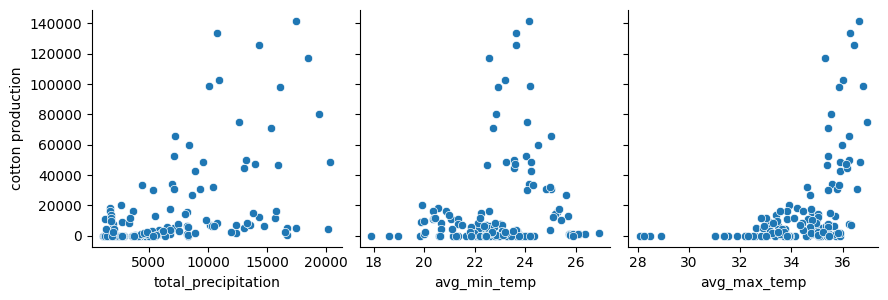

In [46]:
#plotting a pair graph to analyse min temp, max temp and precipitation
sns.pairplot(new_cotton_dataframe,x_vars=["total_precipitation", "avg_min_temp", "avg_max_temp"],
    y_vars=["cotton production"],height=3.5, size = 3)
plt.show()

Observation: Its seen that with good rainfall there are less records of higher cotton production which means many less datasets has higher rainfall pattern.
Similarily it holds for min and max temperature. 

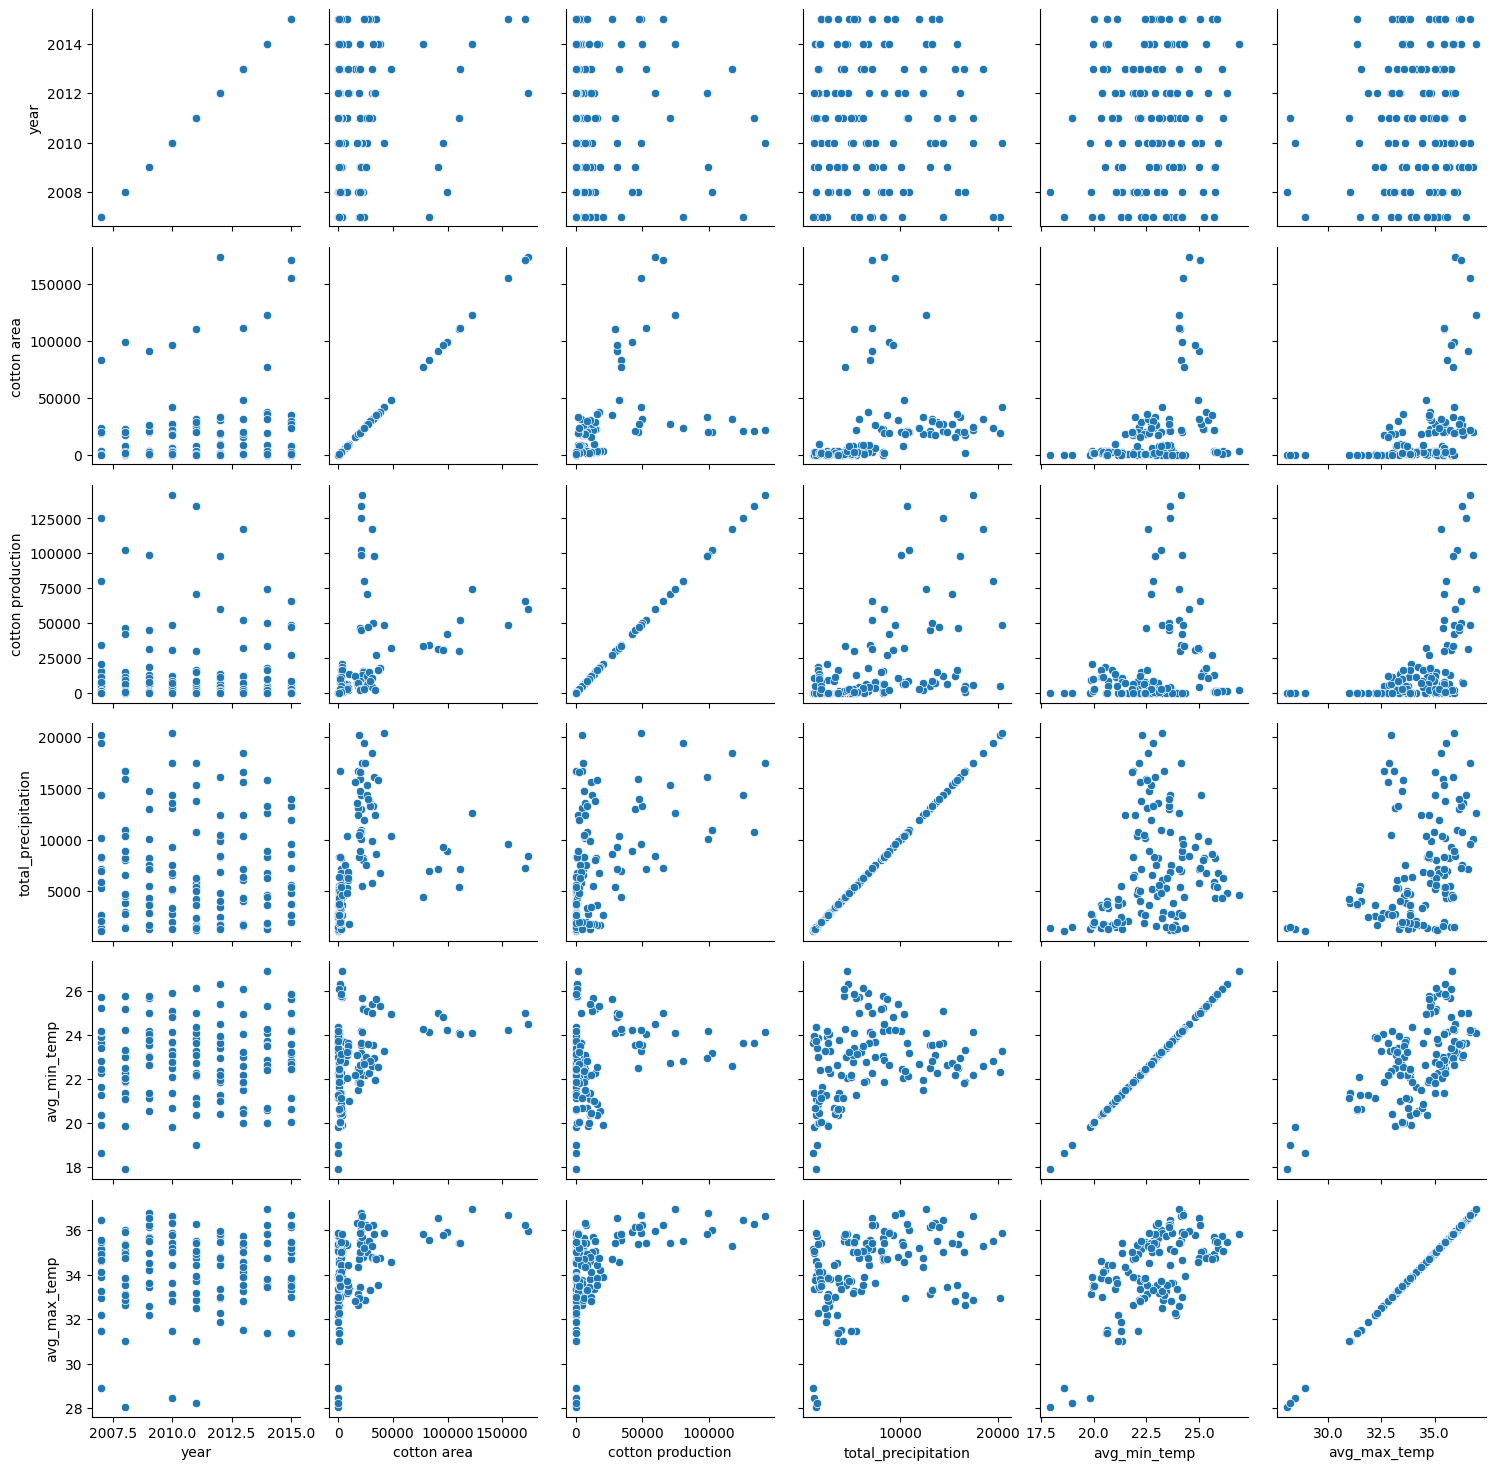

In [47]:
#plotting a pair grid for whole dataset
g = sns.PairGrid(new_cotton_dataframe)
g.map(sns.scatterplot)

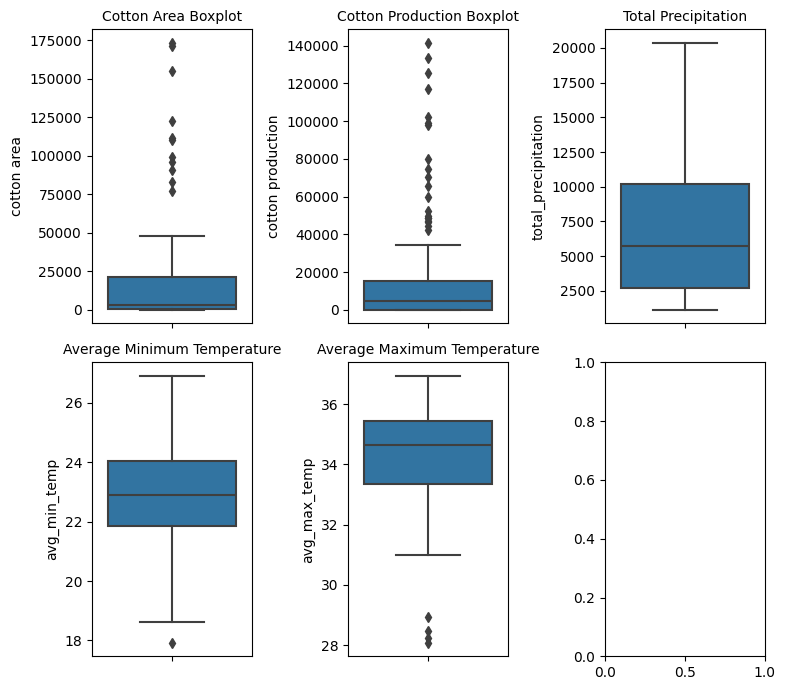

In [48]:
# Create a figure and multiple subplots (axes)
fig, (ax1, ax2) = plt.subplots(2, 3, figsize=(8, 7))

# Looking at distribution of cotton area on first subplot
sns.boxplot(y=new_cotton_dataframe['cotton area'], ax=ax1[0])
ax1[0].set_title('Cotton Area Boxplot',fontsize=10)

# Looking at distribution of cotton production on second subplot
sns.boxplot(y=new_cotton_dataframe['cotton production'], ax=ax1[1])
ax1[1].set_title('Cotton Production Boxplot',fontsize=10)

# Looking at distribution of precipitation on third subplot
sns.boxplot(y=new_cotton_dataframe['total_precipitation'], ax=ax1[2])
ax1[2].set_title('Total Precipitation',fontsize=10)

# Looking at distribution of precipitation on fourth subplot
sns.boxplot(y=new_cotton_dataframe['avg_min_temp'], ax=ax2[0])
ax2[0].set_title('Average Minimum Temperature',fontsize=10)

# Looking at distribution of precipitation on fifth subplot
sns.boxplot(y=new_cotton_dataframe['avg_max_temp'], ax=ax2[1])
ax2[1].set_title('Average Maximum Temperature',fontsize=10)

plt.tight_layout()
plt.show()

Observation: 
Cotton area and cotton production have a lot of outliers.
Total Precipitation, Average Minimum Temperature and Average Maximum Temperature have very less or no outliers 


### Two Variables Analysis - Bivariate analysis

In [49]:
# we will now check only state and production 
production_grp = new_cotton_dataframe.groupby('state name')['cotton production'].sum().reset_index()

# sorting the production value in descending order 
production_grp.sort_values(ascending=False, by='cotton production')

,state name,cotton production
3,Gujarat,725464.0
9,Maharashtra,603075.0
14,Telangana,379759.0
0,Andhra Pradesh,146867.0
11,Punjab,97352.0
4,Haryana,91369.0
6,Karnataka,69103.0
12,Rajasthan,52306.0
8,Madhya Pradesh,44861.0
10,Orissa,20978.0


<Axes: xlabel='cotton production', ylabel='state name'>

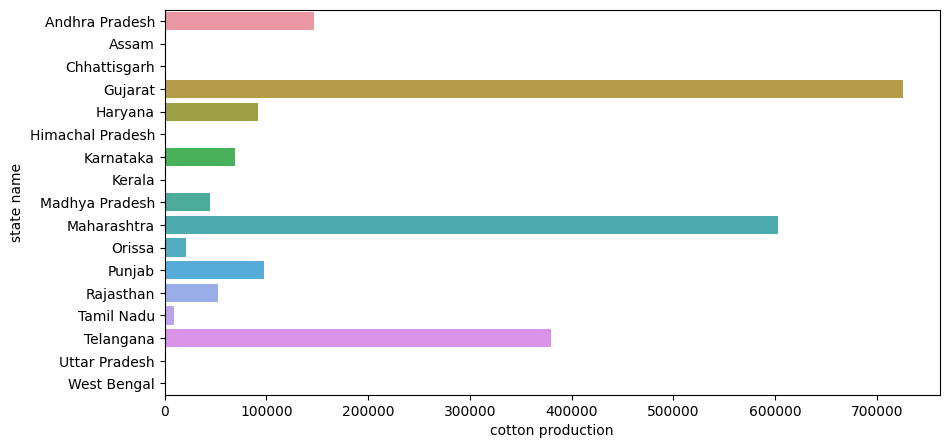

In [50]:
#plotting a bar chart
plt.figure(figsize= (10,5))
sns.barplot(x=production_grp['cotton production'],y= production_grp['state name'], orient='h')

Oservation: Here gujarat has the highest production of cotton over 9 years 

In [51]:
# now plotting area and state
area_grouped = new_cotton_dataframe.groupby('state name')['cotton area'].sum().reset_index()

area_grouped.sort_values(ascending=False, by = 'cotton area')

,state name,cotton area
14,Telangana,1012519.0
3,Gujarat,382046.0
0,Andhra Pradesh,275146.0
9,Maharashtra,254138.0
6,Karnataka,197719.0
12,Rajasthan,194089.0
8,Madhya Pradesh,72216.0
10,Orissa,52856.0
4,Haryana,25516.0
13,Tamil Nadu,20062.0


<Axes: xlabel='cotton area', ylabel='state name'>

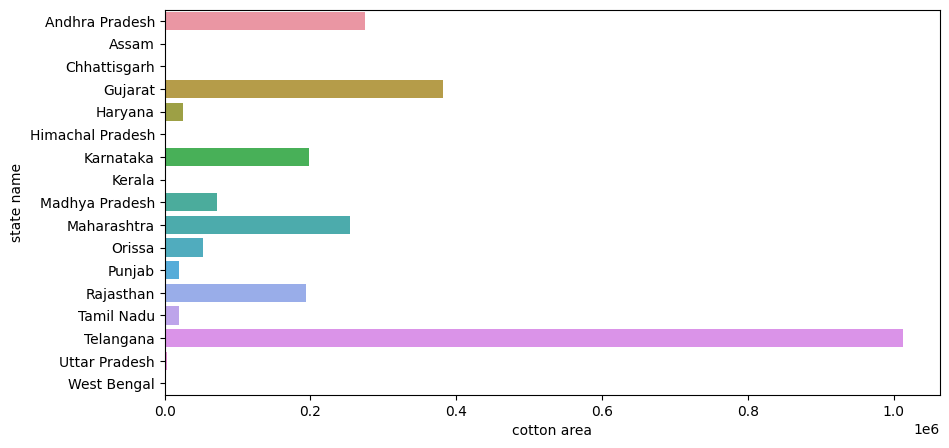

In [52]:
#plotting a bar chart
plt.figure(figsize= (10,5))
sns.barplot(x=area_grouped['cotton area'],y= area_grouped['state name'], orient='h')

Observation: The largest cotton area is owned by Telangana state over 9 years of time duration

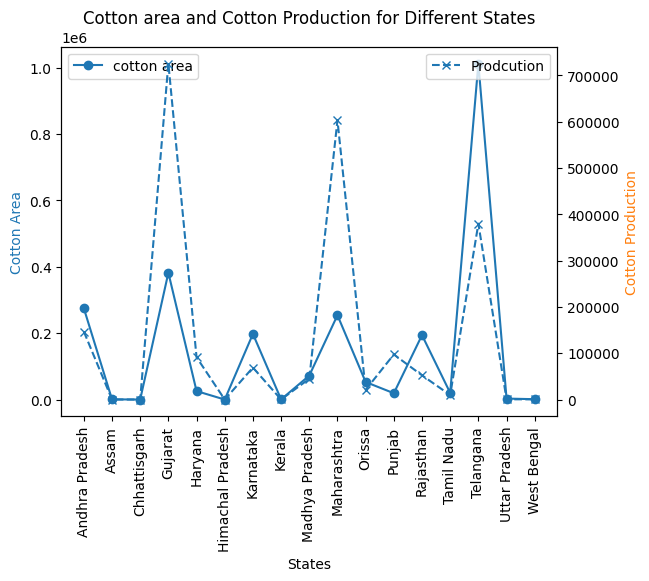

In [53]:
# plotting both cotton production and cotton area in a same bar plot to analyse
area_prod_grp = new_cotton_dataframe.groupby('state name')[['cotton area','cotton production']].sum().reset_index()


# Plotting
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()  


ax1.plot(area_prod_grp['state name'], area_prod_grp['cotton area'], label=f'cotton area', marker='o')
ax2.plot(area_prod_grp['state name'], area_prod_grp['cotton production'], label=f'Prodcution', linestyle='--', marker='x')
ax1.set_xlabel('States')
ax1.set_xticklabels(rotation=90 , labels= area_prod_grp['state name'])
ax1.set_ylabel('Cotton Area', color='tab:blue')
ax2.set_ylabel('Cotton Production', color='tab:orange')


plt.title('Cotton area and Cotton Production for Different States')
# fig.tight_layout()

# Show legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

The graphs shows a realtion between cotton area and cotton production. 

States of gujarat and Maharashtra has less cotton area but more production

State of Telangana has more cotton area but less production 


### Plotting the rainfall pattern over all states in 8 years - Time Analysis


In [54]:

rainfall_grp = new_cotton_dataframe.groupby('state name')['total_precipitation'].sum().reset_index()

rainfall_grp.sort_values(by='total_precipitation', ascending= False)

,state name,total_precipitation
9,Maharashtra,145858.959425
6,Karnataka,137408.820343
12,Rajasthan,105151.568169
3,Gujarat,85872.713966
0,Andhra Pradesh,77645.435798
8,Madhya Pradesh,73934.088012
14,Telangana,64832.637024
13,Tamil Nadu,50489.342667
10,Orissa,50342.756667
1,Assam,36083.690000


<Axes: xlabel='total_precipitation', ylabel='state name'>

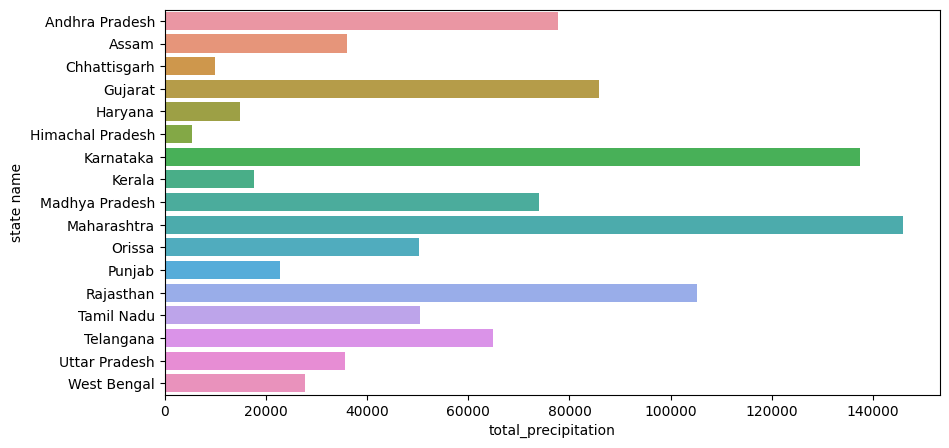

In [55]:
# for a good cotton production a lot of water is required so plotting amount of rainfall with state
#plotting a bar chart
plt.figure(figsize= (10,5))
sns.barplot(x=rainfall_grp['total_precipitation'],y= rainfall_grp['state name'], orient='h')

Observation: Maharashtra has the highest total rainfall

### Cotton Plant Climate Requirements - Research
Cotton is a plant that needs a long frost-free period, a lot of heat and plenty of sunshine. It prefers warm and humid climate. Cotton seeds will have a small germination rate, if the soil temperature is below 60°F (15°C). During active growth, the ideal air temperature is 70 to 100°F (21-37°C). Temperatures well above 100°F are not desirable. However, the average cotton plant can survive in temperatures up to 110°F (43°C) for short periods without great damage, but this also depends on the humidity levels.

#link- https://wikifarmer.com/cotton-growing-conditions/#:~:text=Cotton%20is%20a%20plant%20that,21%2D37%C2%B0C).

Thus a change in Temperature can also affect cotton production.

In [56]:
#visualizing some values and understanding the pattern 

prod_year_grp = new_cotton_dataframe.groupby('year')['cotton production'].sum().reset_index()

prod_year_grp.sort_values(by= 'cotton production', ascending=False)


,year,cotton production
0,2007,306433.0
4,2011,303618.0
3,2010,271511.0
1,2008,244531.0
2,2009,238856.0
6,2013,238729.0
7,2014,215132.0
5,2012,212902.0
8,2015,210421.0


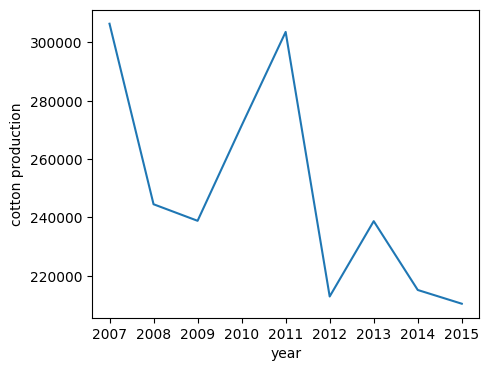

In [57]:
# For time series graph we will plot a line graph
plt.figure(figsize= (5,4))
sns.lineplot(data= prod_year_grp, x = prod_year_grp['year'], y=prod_year_grp['cotton production'])
plt.show()

Observation: The cotton Production kept on decreasing with time period in general trend but had a sudden increase in 2011 due to the fact that in this year India had a normal precipitation and temperature

In [58]:
rainfall_year_grp = new_cotton_dataframe.groupby('year')['total_precipitation'].sum().reset_index()

rainfall_year_grp.sort_values(by= 'total_precipitation', ascending=False)

,year,total_precipitation
3,2010,128642.822216
1,2008,126632.455271
0,2007,122564.336231
4,2011,111980.163394
6,2013,106470.394513
8,2015,93381.491711
5,2012,93331.970372
7,2014,90973.879577
2,2009,87425.374892


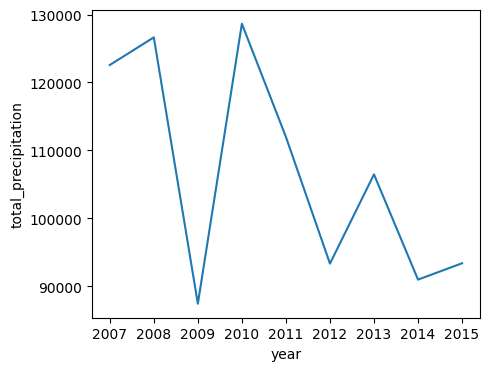

In [59]:
# For time series graph we will plot a line graph
plt.figure(figsize= (5,4))
sns.lineplot(data= rainfall_year_grp, x = rainfall_year_grp['year'], y=rainfall_year_grp['total_precipitation'])
plt.show()

Observation :
Here rainfall in the year 2010-2011 was more than that of 2009 thus this refelcted in cotton production also. 
Here we can relate how rainfall in affecting the cotton production as it is showing a direct relation in a general view 

In [60]:
#min temp vs time

min_temp_year = new_cotton_dataframe.groupby('year')['avg_min_temp'].mean().reset_index()

min_temp_year.sort_values(by= 'avg_min_temp', ascending=False)

,year,avg_min_temp
2,2009,23.317080
8,2015,23.191080
7,2014,23.082116
3,2010,23.049876
5,2012,23.015314
4,2011,22.722285
0,2007,22.688170
6,2013,22.491275
1,2008,22.400906


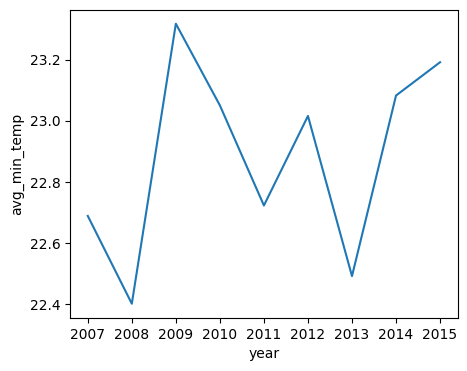

In [61]:
# For time series graph we will plot a line graph
plt.figure(figsize= (5,4))
sns.lineplot(data= min_temp_year, x = min_temp_year['year'], y=min_temp_year['avg_min_temp'])
plt.show()

Observation : 
With passing years the Min Temperature in Centigrade has increase showing the heating of Earth has increased due to global warming and other climate factors 

In [62]:
#max temp vs time

max_temp_year = new_cotton_dataframe.groupby('year')['avg_max_temp'].mean().reset_index()

max_temp_year.sort_values(by= 'avg_max_temp', ascending=False)

,year,avg_max_temp
2,2009,34.879670
7,2014,34.739515
8,2015,34.420589
3,2010,34.311657
6,2013,34.236565
5,2012,34.134204
0,2007,34.075456
4,2011,33.898851
1,2008,33.724647


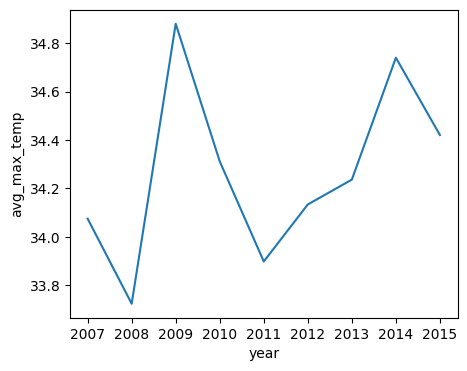

In [63]:
# For time series graph we will plot a line graph
plt.figure(figsize= (5,4))
sns.lineplot(data= max_temp_year, x = max_temp_year['year'], y=max_temp_year['avg_max_temp'])
plt.show()

Observation: With passing the maximum temperature value has also risen again due to global warming 

<Figure size 300x300 with 0 Axes>

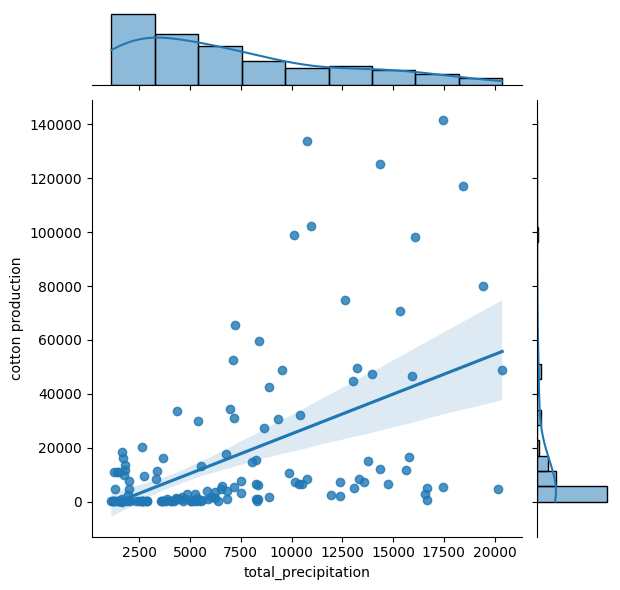

In [64]:
plt.figure(figsize= (3,3))
sns.jointplot(x="total_precipitation",y="cotton production", data= new_cotton_dataframe, kind="reg")
plt.show()

<Figure size 300x300 with 0 Axes>

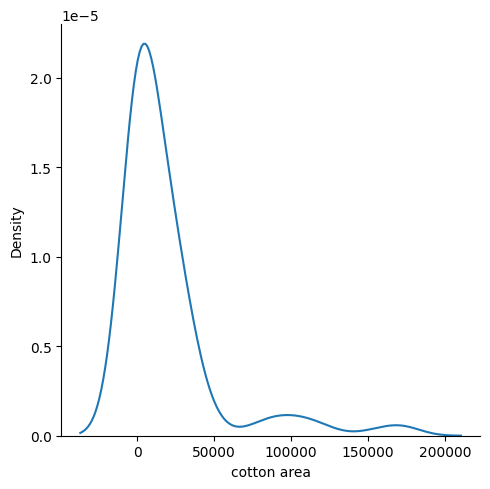

In [65]:
#Plotting density plot for cotton area analysis
plt.figure(figsize= (3,3))
sns.displot(kind='kde', data=new_cotton_dataframe['cotton area'])
plt.show()

<div class="alert alert-block alert-success">
<b> Task 5- Dimensionality Reduction</b> 
</div>

In [66]:
# Checking for Correlation between variables

# for correlation we do not need values of year and state name but with other values 

df_corr = new_cotton_dataframe[['cotton area','cotton production','total_precipitation','avg_min_temp', 'avg_max_temp' ]]
df_corr.corr()


,cotton area,cotton production,total_precipitation,avg_min_temp,avg_max_temp
cotton area,1.000000,0.462993,0.319642,0.332340,0.422831
cotton production,0.462993,1.000000,0.509652,0.184241,0.480086
total_precipitation,0.319642,0.509652,1.000000,0.229920,0.369164
avg_min_temp,0.332340,0.184241,0.229920,1.000000,0.591977
avg_max_temp,0.422831,0.480086,0.369164,0.591977,1.000000


<Axes: >

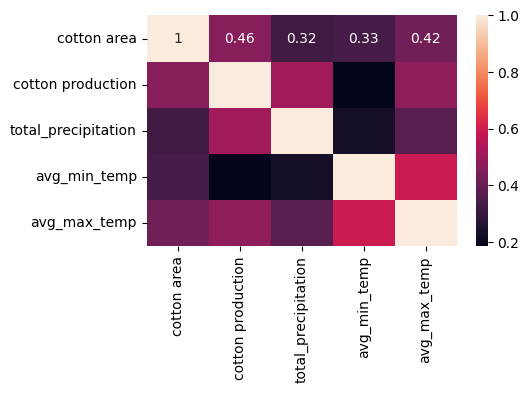

In [67]:
#plotting a heat map for correlation observation
plt.figure(figsize= (5,3))
plt.tick_params(labelsize=10)
sns.heatmap(df_corr.corr(),annot=True)

Observation:
There is high value of correlation between variables.
For a good clustering the correlation between variables/features must be low.

Therefore we perform PCA and following are the advantages of using it
 - More efficient computation and storage 
 - Remove noise or outliers
 - Fundamental dimension reduction technique - PCA 

Standardize the data before Clustering

In [68]:
#creating copy of new cotton dataframe to work for pca and clustering 
cotton_dataframe_cpy = new_cotton_dataframe.copy()

#observing first five rows 
cotton_dataframe_cpy.head()

,year,state name,cotton area,cotton production,total_precipitation,avg_min_temp,avg_max_temp
0,2007,Andhra Pradesh,22592.0,15513.0,8244.134762,25.253229,34.789628
1,2007,Assam,84.0,13.0,5528.860000,21.291667,31.495833
2,2007,Chhattisgarh,5.0,4.0,1207.398333,23.644167,35.143833
3,2007,Gujarat,20913.0,125333.0,14367.993022,23.643418,36.446790
4,2007,Haryana,1713.0,11095.0,1423.580000,20.359028,34.629861


In [69]:
"""For the features analysis we will not consider the year and state name category thus we will drop them first for analysis and cotton area and 
cotton production since I do not wish to know how area is affecting the cotton production rather only the climate change of rainfall amount and temperature effect""" 

#dropping values 
cotton_dataframe_cpy.drop(columns=['year','state name', 'cotton area','cotton production'], inplace=True)

### Standard Scaler
- feature standardization imporoves clustering
- Scaled data will have mean 0 and standard deviation 1 for each feature
- we have to scale because some units are in 1000 ha, some 1000 tons, some millimeter and some in centigrade

In [70]:
#creating standard scaler object 
scaler = StandardScaler() 

#performing fit and then transform together 
# fit() - learns transformation from data
# transform() - applied learned tranformation
scaled_data = scaler.fit_transform(cotton_dataframe_cpy) 

#observing scaled data
scaled_data

array([[ 0.2333692 ,  1.37175522,  0.32209314],
       [-0.30591907, -0.90918175, -1.62276772],
       [-1.16421658,  0.44531013,  0.53123797],
       [ 1.44964571,  0.44487918,  1.3005843 ],
       [-1.12128014, -1.44616444,  0.22775686],
       [-1.17958094, -2.4512777 , -3.14337161],
       [ 2.60141351, -0.32022735, -0.75374396],
       [-0.89447428,  0.61124298, -1.20668877],
       [ 0.01606478, -0.34423322,  0.54964071],
       [ 2.45662421, -0.02032239,  0.75949756],
       [-0.34430893,  0.32475891, -0.56051003],
       [-0.88010067, -1.69419207, -0.19837635],
       [ 0.61533765, -0.24418595,  0.73858656],
       [-0.23857901,  1.65034249,  0.39882685],
       [-0.01811108,  0.73924832,  0.78560295],
       [-0.99914719, -0.69902679, -0.06788423],
       [ 0.24774384,  0.75420913,  0.24634001],
       [ 0.19065544,  1.33591544,  0.4762547 ],
       [-0.6483712 , -0.87799437, -1.90053093],
       [-0.83539293, -0.34996804, -0.24649901],
       [ 0.771387  ,  0.19231549,  1.055

Observation :
- Some values are negative that indicate  the values are below the mean of the respective feature before scaling.
- Inference : If we have a feature that has been scaled using StandardScaler, and a specific value for that feature after scaling is -1, it means that the original value was below the mean value for that feature. A value of +1 would indicate it was above the mean, and 0 would indicate it was exactly at the mean.

We use PCA to reduce the dimensionality of our data

Since clustering methods suffer from the "curse of dimensionality," we make our data less complex.

Pca features are not linearly correlated 

Pca aligns the data with axes

In [71]:
#inserting scaled data for the PCA not considering state name and year again
pca = PCA()


transformed_pca = pca.fit_transform(scaled_data)

print(f"transformed pca is {transformed_pca}")

transformed pca is [[-1.14427871e+00 -5.10855598e-01 -6.85252034e-01]
 [ 1.74300712e+00  4.50236893e-01 -5.59272675e-01]
 [-7.24794646e-02 -1.30680450e+00  3.50605003e-01]
 [-1.78519988e+00  8.12132452e-01  3.80015712e-01]
 [ 1.24471371e+00 -3.12479629e-01  1.32422740e+00]
 [ 4.06491434e+00  6.96973877e-01 -5.21207759e-01]
 [-5.25963202e-01  2.52268951e+00 -8.92988294e-01]
 [ 8.29811699e-01 -8.55656826e-01 -1.09957444e+00]
 [-1.56559085e-01  8.42461367e-02  6.23900101e-01]
 [-1.62132138e+00  1.99475087e+00  6.73648074e-02]
 [ 3.27780347e-01 -3.55708801e-01 -5.51561217e-01]
 [ 1.55871177e+00  8.70446163e-02  1.11671751e+00]
 [-6.17749405e-01  5.19962955e-01  5.76022141e-01]
 [-1.14284137e+00 -1.06374961e+00 -7.08493820e-01]
 [-9.46934166e-01 -5.04238955e-01  1.14222794e-01]
 [ 9.29418117e-01 -5.14151158e-01  6.02803757e-01]
 [-7.29531638e-01 -1.89916661e-01 -3.50152929e-01]
 [-1.20285960e+00 -5.56942739e-01 -5.39241762e-01]
 [ 2.06344920e+00  1.88101570e-01 -7.14193487e-01]
 [ 7.5883922

### Intrinsic Dimension 
- Number of features needed to approximate the dataset
- Essential for dimension reduction 
- Intrinsic dimension = number of PCA features with significant variance 

Why to use PCA ?
- Data in raw may lead to bias in clustering, Thus we need normalization of individual variables


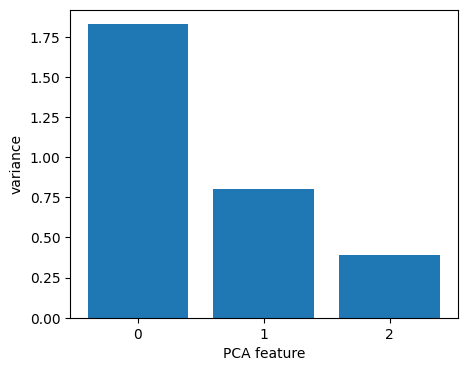

In [72]:
#plotting features and checking the variance to select the number of significant features for our clustering 
features_pca= range(pca.n_components_) 
plt.figure(figsize=(5,4))
plt.bar(features_pca, pca.explained_variance_)
plt.xticks(features_pca)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()


PCA Summary

The above plot shows us the total explained variance for the number of principal components we use. For our case, we will use 2 principal components as these both have significant variance.

The significant variance is the actual dimension, in this assumes that low variance means that features are noise.

High variance feature are informative, thus according to the graoh we will computer PCA model with 2 components

In [73]:
#creating model pca for our clustering by conaisering 2 components features 
# n components here are the features which are significant for our analysis 
model_pca = PCA(n_components=2)

reduced_pca_data = model_pca.fit_transform(scaled_data)

print(f"transformed pca is {reduced_pca_data}")

transformed pca is [[-1.14427871e+00 -5.10855598e-01]
 [ 1.74300712e+00  4.50236893e-01]
 [-7.24794646e-02 -1.30680450e+00]
 [-1.78519988e+00  8.12132452e-01]
 [ 1.24471371e+00 -3.12479629e-01]
 [ 4.06491434e+00  6.96973877e-01]
 [-5.25963202e-01  2.52268951e+00]
 [ 8.29811699e-01 -8.55656826e-01]
 [-1.56559085e-01  8.42461367e-02]
 [-1.62132138e+00  1.99475087e+00]
 [ 3.27780347e-01 -3.55708801e-01]
 [ 1.55871177e+00  8.70446163e-02]
 [-6.17749405e-01  5.19962955e-01]
 [-1.14284137e+00 -1.06374961e+00]
 [-9.46934166e-01 -5.04238955e-01]
 [ 9.29418117e-01 -5.14151158e-01]
 [-7.29531638e-01 -1.89916661e-01]
 [-1.20285960e+00 -5.56942739e-01]
 [ 2.06344920e+00  1.88101570e-01]
 [ 7.58839224e-01 -5.09547242e-01]
 [-1.15895578e+00  3.91034343e-01]
 [ 1.30254182e+00 -4.11680256e-01]
 [ 4.60222766e+00  1.02734261e+00]
 [ 8.70573893e-02  2.08587839e+00]
 [ 7.60030556e-01 -6.88905766e-01]
 [ 1.23485397e-01  1.01938012e-01]
 [-1.12404927e+00  1.50006937e+00]
 [ 4.56452029e-01 -4.11046856e-01]
 

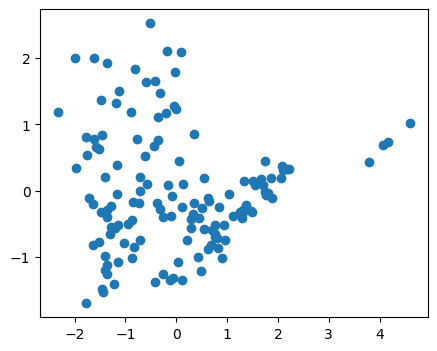

In [74]:
#visualize both the features in a scatter plot
plt.figure(figsize=(5,4))
plt.scatter(reduced_pca_data[:,0], reduced_pca_data[:,1])

In [75]:
#getting components values which we have picked up 
for i in np.arange(2):
    index =  np.argmax(np.absolute(model_pca.get_covariance()[i]))
    max_cov = model_pca.get_covariance()[i][index]
    column = cotton_dataframe_cpy.columns[index]
    print("Principal Component", i+1, "maximum covariance :", "{:.2f}".format(max_cov), "from column", column)

Principal Component 1 maximum covariance : 1.01 from column total_precipitation
Principal Component 2 maximum covariance : 1.01 from column avg_min_temp


Interpret PCA

Since the principal components are linear combinations of the attributes, we are basically trying to identify which variables affect the principal components the most. More specifically, we look at the covariance matrix to see which attribute has the most covariance with the principal component.

For the first principal component, the total_precipitation column has the most covariance. We could think of the first principal component as being representative of rainfall. The total_precipitation refers to the rainfall amount in that state.

For the second principal component, the avg_min_temp column has the most covariance. Loosely speaking, the second principal component is representative of the average minimum temperature. The avg_min_temp tells us what is the average minimum temperature of that state.

<div class="alert alert-block alert-success">
<b> Task 6- Clustering -The exploratory phase of analysis </b> 
</div>

## K-Means

K-means is an unsupervised machine learning technique that allow us to cluster data points. This enables us to find patterns in the data that can help us analyze it more effectively. K-means is an iterative algorithm, which means that it will converge to the optimal clustering over time.

To run a k-means clustering:

- Specify the number of clusters you want (usually referred to as k).
- Randomly initialize the centroid for each cluster. The centroid is the data point that is in the center of the cluster.
- Determine which data points belong to which cluster by finding the closest centroid to each data point.
- Update the centroids based on the geometric mean of all the data points in the cluster.
- Run 3 and 4 until the centroids stop changing. Each run is referred to as an iteration.


### Choosing the number of clusters
WCSS = within cluster sum of squares 

- It is also called as distortion which is sum of squares of data points from clustre center.

- distortion decrease with increasing clusters

In [76]:
WCSS = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(reduced_pca_data)
    
    WCSS.append(kmeans.inertia_)

### Elbow method graph of inertia and cluster 

Usage of Elbow Method over Kmeans

In the below plot, we are looking for an "elbow." The elbow tells us the point where increasing the number of variables does not yield a significant decrease in inertia. The inertia here is referring to within cluster sum of squares. It tells how compact a given cluster is.

Text(0, 0.5, 'Inertia/ WCSS')

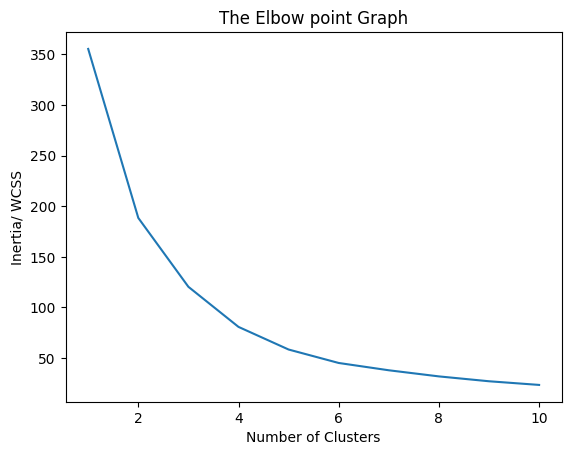

In [77]:
# Plotting an elbow graph to get the number of cluster 
plt.plot(range(1,11), WCSS)
plt.title('The Elbow point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia/ WCSS')

Observation of elbow graph:
- We can see that after number of clusters 4 the distortion or inertia is decreasing effectively. Thus 4 can act as an elbow point
- From elbow graph we can consider number of clusters to be 4  

### Silhoutte method for calculation of number of clusters

- For checking the number of clusters we will use this technique so as to confirm it and accurately find the result.

For n_clusters = 2 The average silhouette_score is : 0.4323070190171111
For n_clusters = 3 The average silhouette_score is : 0.4447159363976282
For n_clusters = 4 The average silhouette_score is : 0.4741549580253471


For n_clusters = 5 The average silhouette_score is : 0.46450775615805084
For n_clusters = 6 The average silhouette_score is : 0.4299267674722453


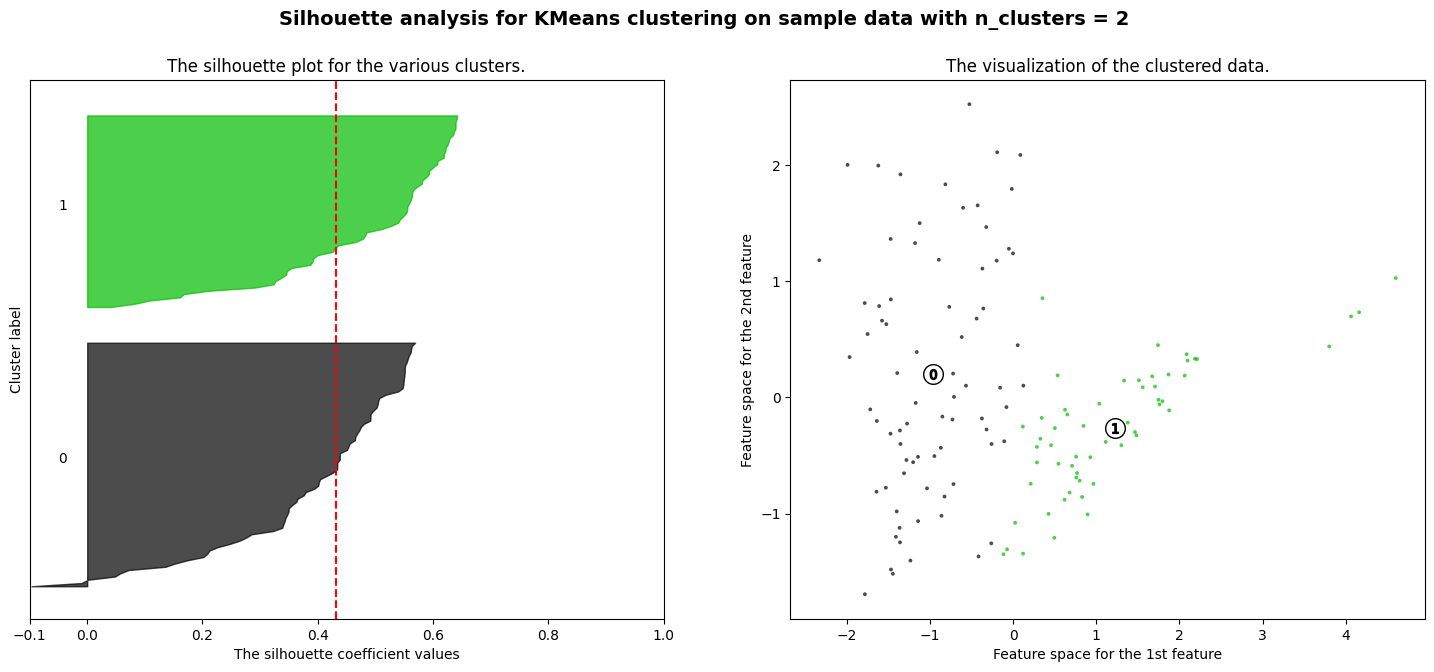

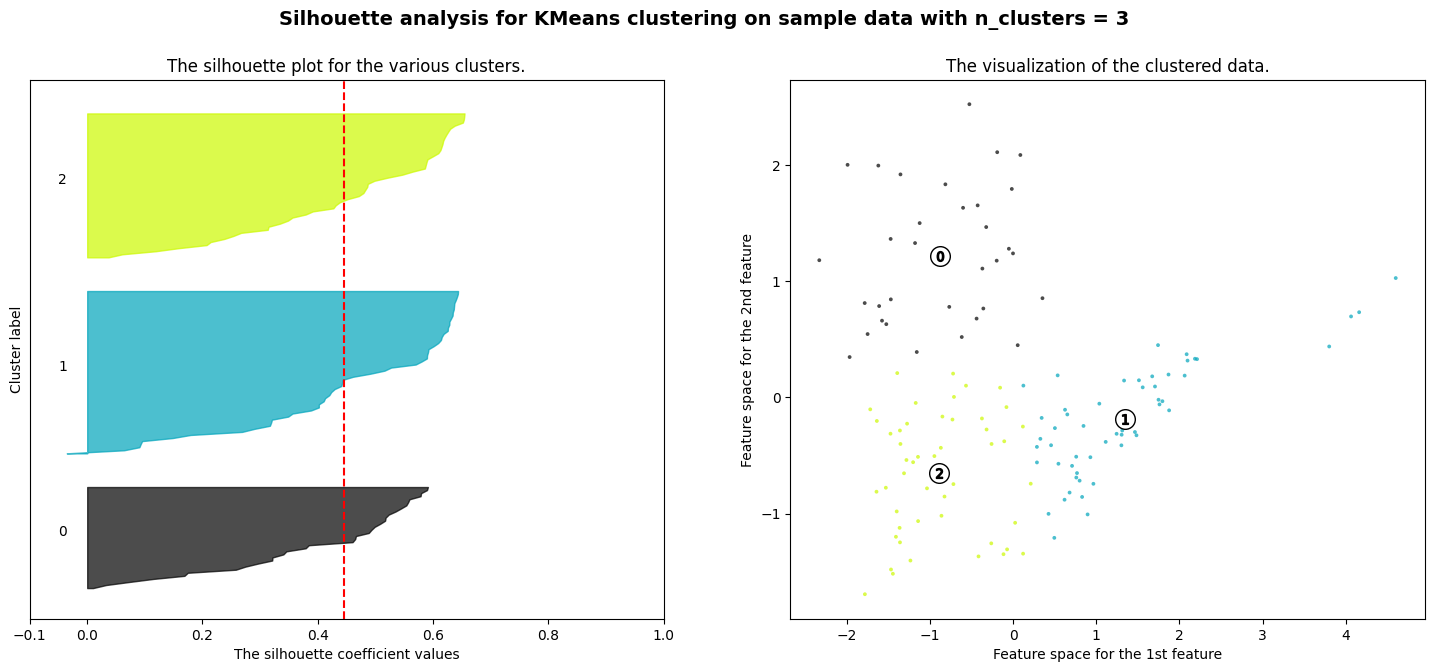

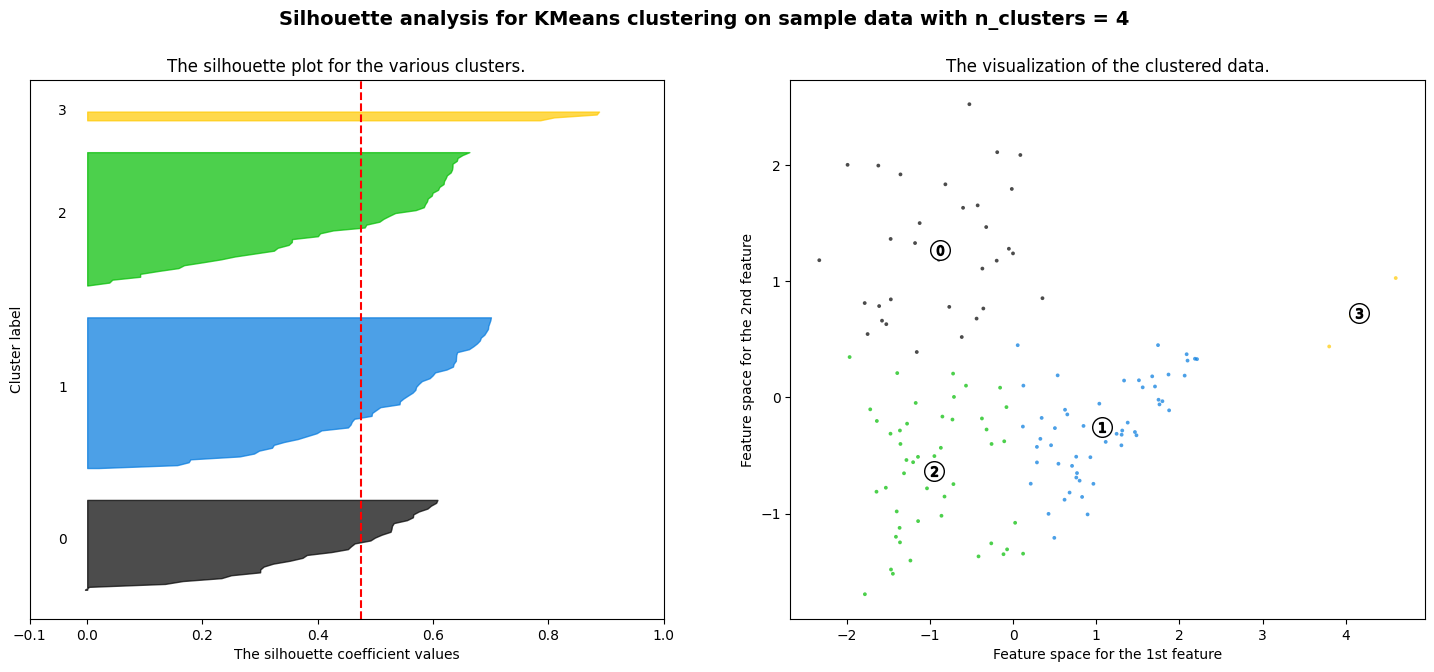

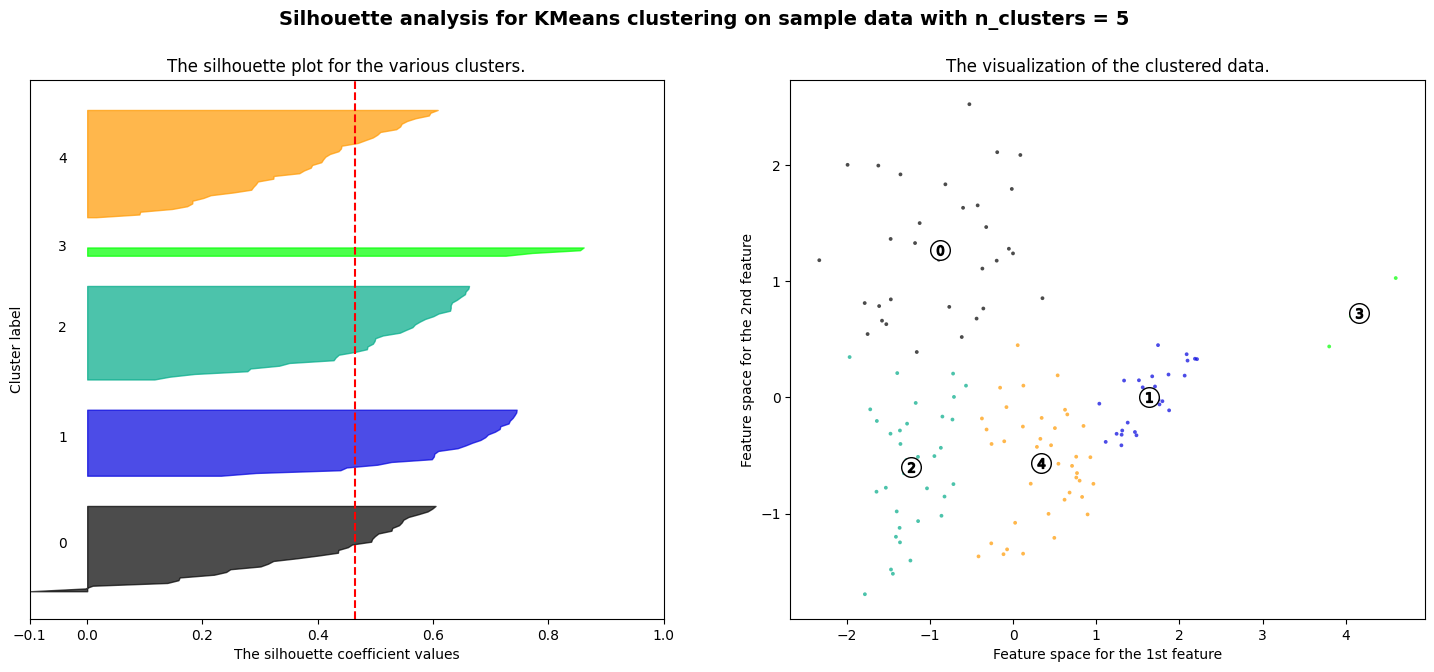

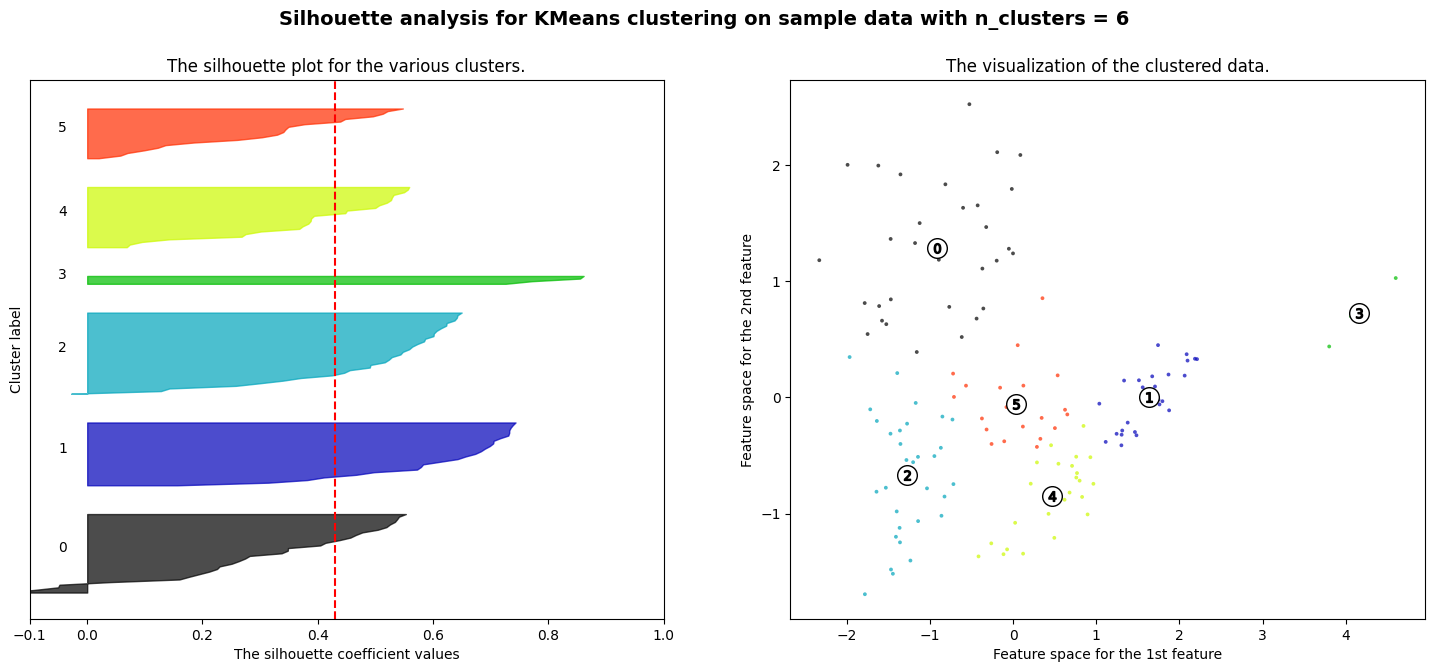

In [78]:
# code taken from sklearn silhoutte analysis for kmeans 
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
   
    ax1.set_xlim([-0.1, 1])
 
    ax1.set_ylim([0, len(reduced_pca_data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(reduced_pca_data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(reduced_pca_data, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(reduced_pca_data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        reduced_pca_data[:, 0], reduced_pca_data[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()



Observation: 

The result of our clustering is not good, as all the values of number of clusters in falling in category of weak structure as silhoutte coefficient is below 0.5. But then too we will consider then number of clusters to be 4 as it has the highest 0.47 silhoutte coefficient for our kmeans clustering. 

Result : With elbow method and silhoutte we can apporximate then an optimal number of cluster can be 4

In [79]:
# kmeans code taken from lectures

kmeans_pp = KMeans(
    n_clusters=4, # find 4 clusters
    random_state=42, # make experiments replicable
    n_init=20, # find the best clustering out of 20 tries with different initialization
    init='k-means++', # use k-means++ initialization
    max_iter=300, tol=0.0001) ## abort after 300 iterations or if the cost function does not change more than tol

In [80]:
start_time=time.time()
cluster_assignments=kmeans_pp.fit_predict(reduced_pca_data)
print(time.time()-start_time)

#printing cluster assignments
print(cluster_assignments)

0.07913565635681152
[1 0 3 2 3 0 2 3 3 2 3 0 2 1 1 3 1 1 0 3 2 3 0 2 3 3 2 3 0 2 1 1 3 2 1 0 1
 3 2 3 1 2 3 3 1 1 1 3 2 0 2 3 0 2 3 1 2 3 3 2 1 1 3 1 0 3 1 3 0 2 3 2 2 3
 3 2 1 1 3 3 1 0 1 3 2 3 3 2 1 0 2 1 1 3 3 1 0 3 3 2 2 2 3 0 2 1 1 3 1 0 1
 1 3 2 1 2 3 0 1 1 1 3 1 0 1 3 2 3 1 2 3 0 2 1 1 3]


In [81]:
def k_means_report(kmeans):
    print(f'k-means \n * has seen {kmeans.n_features_in_} features,\n \
* used {kmeans.n_iter_} iterations, and \n \
* resulted in an inertia of {kmeans.inertia_}.')

In [82]:
# Finding the report of kmeans that is features, iterations used and inertia value
k_means_report(kmeans_pp)

k-means 
 * has seen 2 features,
 * used 6 iterations, and 
 * resulted in an inertia of 80.68487775354794.


Visualizing all the Cluster 

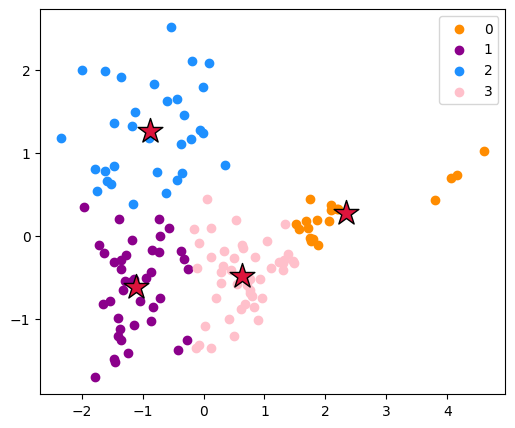

In [83]:
colors=['darkorange', 'darkmagenta', 'dodgerblue', 'pink']

def print_clustering(X, kmeans, cluster_assignments):
    plt.figure(figsize=(6, 5))

    for i in np.unique(cluster_assignments):
        X_sub=X[cluster_assignments==i, :]
        plt.scatter(X_sub[:, 0], X_sub[:, 1], c=colors[i], label=i)
   
    
    plt.scatter(
        kmeans.cluster_centers_[:, 0], 
        kmeans.cluster_centers_[:, 1],
        s=350, marker='*', c='crimson', edgecolor='black'
    )

    plt.legend()
    
print_clustering(reduced_pca_data, kmeans_pp, cluster_assignments)

After visualizing we can see that the cluster arrangements looks good as the outliers perhaps are in different cluster

In [84]:
#fetching the labels of kmeans clustering 
labels = kmeans_pp.labels_

#fetching cluster centers
cluster_centers = kmeans_pp.cluster_centers_

In [85]:
#creating a new cloumn for cluster labels 
cotton_dataframe_cpy['cluster'] = labels

#observing cluster labels
cotton_dataframe_cpy

,total_precipitation,avg_min_temp,avg_max_temp,cluster
0,8244.134762,25.253229,34.789628,1
1,5528.860000,21.291667,31.495833,0
2,1207.398333,23.644167,35.143833,3
3,14367.993022,23.643418,36.446790,2
4,1423.580000,20.359028,34.629861,3
...,...,...,...,...
131,1929.115000,20.028194,33.491528,0
132,11942.788889,22.706634,35.224152,2
133,5359.913333,25.877569,35.483542,1
134,7200.891429,25.031935,36.250610,1


In [86]:
#putting column values so as to observe how clustering is done, index mapping
cotton_dataframe_cpy['state'] = new_cotton_dataframe['state name']
cotton_dataframe_cpy['cotton production'] = new_cotton_dataframe['cotton production']
cotton_dataframe_cpy['year'] = new_cotton_dataframe['year']

In [87]:
#checking for data falling in cluter 1 
kmeans_cluster1 = cotton_dataframe_cpy[cotton_dataframe_cpy['cluster'] == 0]

#number of states falling in first cluster 
print(f'States falling in cluster 1: {kmeans_cluster1["state"].unique()}')

#maximum rainfall in first cluster 
print(f'Maximum Amount of Rainfall in cluster 1: {kmeans_cluster1["total_precipitation"].max()}')

#maximum average minimum temperature in first cluster 
print(f'Maxium average minimum temperature in cluster 1: {kmeans_cluster1["avg_min_temp"].max()} ')

#maximum average maximum temperature in first cluster 
print(f'Maximum average maximum temperature in cluster 1: {kmeans_cluster1["avg_max_temp"].max()} ')

#maximum cotton production in first cluster 
print(f'Maximum cotton production in cluster 1: {kmeans_cluster1["cotton production"].max()} ')

print(f'The year data which is mazimum in this cluster: {kmeans_cluster1.groupby("year")["year"].agg("count").nlargest(1)}')

States falling in cluster 1: ['Assam' 'Himachal Pradesh' 'Punjab']
Maximum Amount of Rainfall in cluster 1: 5528.86
Maxium average minimum temperature in cluster 1: 22.1075 
Maximum average maximum temperature in cluster 1: 33.908166666666666 
Maximum cotton production in cluster 1: 20357.0 
The year data which is mazimum in this cluster: year
2007    3
Name: year, dtype: int64


In [88]:
#checking for data falling in cluter 2
kmeans_cluster2 = cotton_dataframe_cpy[cotton_dataframe_cpy['cluster'] == 1]

#number of states falling in second cluster 
print(f'States falling in cluster 2: {kmeans_cluster2["state"].unique()}')

#maximum rainfall in second cluster 
print(f'Maximum Amount of Rainfall in cluster 2: {kmeans_cluster2["total_precipitation"].max()}')

#maximum average minimum temperature in second cluster 
print(f'Maxium average minimum temperature in cluster 2: {kmeans_cluster2["avg_min_temp"].max()} ')

#maximum average maximum temperature in second cluster 
print(f'Maximum average maximum temperature in cluster 2: {kmeans_cluster2["avg_max_temp"].max()} ')

#maximum cotton production in second cluster 
print(f'Maximum cotton production in cluster 2: {kmeans_cluster2["cotton production"].max()} ')

print(f'The year data which is mazimum in this cluster: {kmeans_cluster2.groupby("year")["year"].agg("count").nlargest(1)}')

States falling in cluster 2: ['Andhra Pradesh' 'Tamil Nadu' 'Telangana' 'West Bengal' 'Gujarat'
 'Madhya Pradesh' 'Rajasthan' 'Chhattisgarh' 'Orissa']
Maximum Amount of Rainfall in cluster 2: 12643.384545454546
Maxium average minimum temperature in cluster 2: 26.907 
Maximum average maximum temperature in cluster 2: 36.94341394716395 
Maximum cotton production in cluster 2: 133756.0 
The year data which is mazimum in this cluster: year
2014    7
Name: year, dtype: int64


In [89]:
#checking for data falling in cluter 3
kmeans_cluster3 = cotton_dataframe_cpy[cotton_dataframe_cpy['cluster'] == 2]

#number of states falling in third cluster 
print(f'States falling in cluster 3: {kmeans_cluster3["state"].unique()}')

#maximum rainfall in third cluster 
print(f'Maximum Amount of Rainfall in cluster 3: {kmeans_cluster3["total_precipitation"].max()}')

#maximum average minimum temperature in third cluster 
print(f'Maxium average minimum temperature in cluster 3: {kmeans_cluster3["avg_min_temp"].max()} ')

#maximum average maximum temperature in third cluster 
print(f'Maximum average maximum temperature in cluster 3: {kmeans_cluster3["avg_max_temp"].max()} ')

#maximum cotton production in third cluster 
print(f'Maximum cotton production in cluster 3: {kmeans_cluster3["cotton production"].max()} ')

print(f'The year data which is mazimum in this cluster: {kmeans_cluster3.groupby("year")["year"].agg("count").nlargest(1)}')


States falling in cluster 3: ['Gujarat' 'Karnataka' 'Maharashtra' 'Rajasthan' 'West Bengal'
 'Andhra Pradesh' 'Madhya Pradesh']
Maximum Amount of Rainfall in cluster 3: 20374.346236263737
Maxium average minimum temperature in cluster 3: 25.116435185185182 
Maximum average maximum temperature in cluster 3: 36.65111645299145 
Maximum cotton production in cluster 3: 141626.0 
The year data which is mazimum in this cluster: year
2008    5
Name: year, dtype: int64


In [90]:
#checking for data falling in cluter 4
kmeans_cluster4 = cotton_dataframe_cpy[cotton_dataframe_cpy['cluster'] == 3]

#number of states falling in fourth cluster 
print(f'States falling in cluster 4: {kmeans_cluster4["state"].unique()}')

#maximum rainfall in fourth cluster 
print(f'Maximum Amount of Rainfall in cluster 4: {kmeans_cluster4["total_precipitation"].max()}')

#maximum average minimum temperature in fourth cluster 
print(f'Maxium average minimum temperature in cluster 4: {kmeans_cluster4["avg_min_temp"].max()} ')

#maximum average maximum temperature in fourth cluster 
print(f'Maximum average maximum temperature in cluster 4: {kmeans_cluster4["avg_max_temp"].max()} ')

#maximum cotton production in fourth cluster 
print(f'Maximum cotton production in cluster 4: {kmeans_cluster4["cotton production"].max()} ')

print(f'The year data which is mazimum in this cluster: {kmeans_cluster4.groupby("year")["year"].agg("count").nlargest(1)}')

States falling in cluster 4: ['Chhattisgarh' 'Haryana' 'Kerala' 'Madhya Pradesh' 'Orissa'
 'Uttar Pradesh' 'Punjab' 'West Bengal']
Maximum Amount of Rainfall in cluster 4: 8343.394285714287
Maxium average minimum temperature in cluster 4: 24.362240429505135 
Maximum average maximum temperature in cluster 4: 35.41861111111111 
Maximum cotton production in cluster 4: 18505.0 
The year data which is mazimum in this cluster: year
2011    7
Name: year, dtype: int64


## Cluster Interpretation

### Observing the result in our clusters:
- For cluster 1 Rainfall = 5528.86 and Minimum Temperature with max value = 22.1075  producing cotton = 20357.0 

- For cluster 2 Rainfall = 12643.38 and Minimum Temperature with max value = 26.907  producing cotton = 133756.0 

- For cluster 3 Rainfall = 20374.34 and Minimum Temperature with max value = 25.11  producing cotton = 141626.0

- For cluster 4 Rainfall = 8343.39 and Minimum Temperature with max value = 24.36  producing cotton = 18505.0 

### Inference 

The cluster 3 has the highest rainfall and the highest cotton production. Thus these states under their years follows the same trend.

Temperature has not much effect on cotton production as much as the rainfall. This is also because cotton production require higher temperature condition for good production which can be seen in cluster 2. 

Overall we can see that clusters are formed on the basis of rainfall and includes those states in those years where rainfall has played an important role.




### Advantages of k-means
- kmeans significantly faster on large datasets. In this time taken for calculation is 0.052 ms
- K-means tends to work well with clusters of approximately similar size and density


### Limitations of k-means
- The results can be sensitive to the initial placement of centroids, potentially leading to different outcomes based on initialization
- Outliers can significantly affect the cluster centroids and, consequently, the resulting clusters

### Hierarchical Clustering

Agglomerative Hierarchical clustering Technique: In this technique, initially each data point is considered as an individual cluster. At each iteration, the similar clusters merge with other clusters until one cluster or K clusters are formed.

The basic algorithm of Agglomerative:

Compute the proximity matrix
Let each data point be a cluster
Repeat: Merge the two closest clusters and update the proximity matrix
Until only a single cluster remains

In agglomerative clustering we will first decide the number of clusters using silhoutte score 

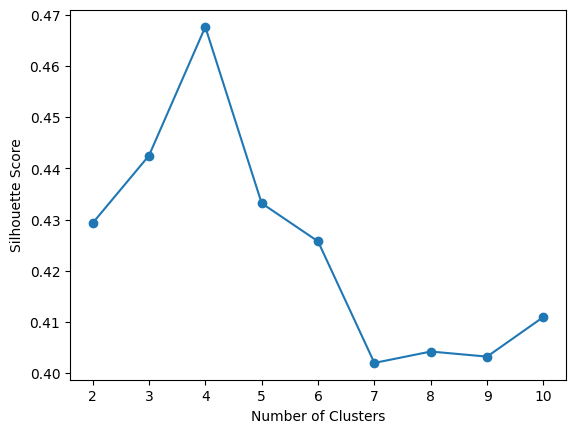

In [91]:
# for detecting number of clusters = > -1 to 1 ( 1 being best)

#the code has been taken from lectures 

silhouette_scores = []

for n_clusters in range(2, 11):  # Try different cluster numbers
    cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = cluster.fit_predict(reduced_pca_data)
    silhouette_scores.append(silhouette_score(reduced_pca_data, labels))

# Plotting the silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In heirarchical clusering too the number of clusters 4 has the highest silhoutte score thus we will take number of cluster as 4 

In [92]:
agg = AgglomerativeClustering(
    n_clusters=4, 
    metric='euclidean', 
    linkage='ward', 
    compute_distances=True)

In [93]:
agg_labels = agg.fit_predict(reduced_pca_data)

#checking agg labels 

In [94]:
def create_scatterPlot(agg_label):
    plt.figure(figsize=(5, 4))

    colors = ['red', 'blue', 'green', 'orange']
    for i in range(len(reduced_pca_data)):
        plt.scatter(reduced_pca_data[i, 0], reduced_pca_data[i, 1], color=colors[agg_label[i]], s=5)


    plt.title('Agglomerative Clustering')
    plt.xlabel('Total Precipitation')
    plt.ylabel('Avg Min Temperature')
    plt.show()

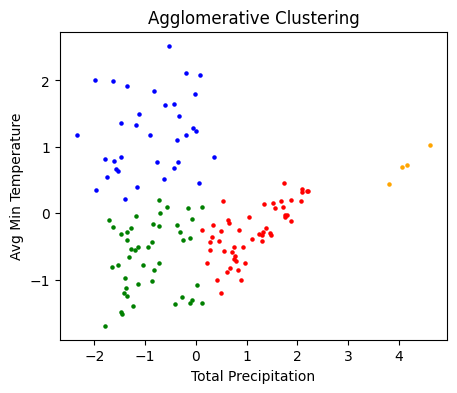

In [95]:
#plotting scatter plot with labels in agglomerative clustering 
create_scatterPlot(agg_labels)

In [96]:
#creating new dataframe with agglomerative clustering 
cluster_mapping_hirerachy = pd.DataFrame()
cluster_mapping_hirerachy['state'] = new_cotton_dataframe['state name']
cluster_mapping_hirerachy['total_precip'] = new_cotton_dataframe['total_precipitation']
cluster_mapping_hirerachy['production'] = new_cotton_dataframe['cotton production']
cluster_mapping_hirerachy['year'] = new_cotton_dataframe['year']
cluster_mapping_hirerachy['min_temp'] = new_cotton_dataframe['avg_min_temp']
cluster_mapping_hirerachy['max_temp'] = new_cotton_dataframe['avg_max_temp']

In [97]:
cluster_mapping_hirerachy['cluster'] = agg_labels

#obseving dataframe with clusters labels 
cluster_mapping_hirerachy

,state,total_precip,production,year,min_temp,max_temp,cluster
0,Andhra Pradesh,8244.134762,15513.0,2007,25.253229,34.789628,2
1,Assam,5528.860000,13.0,2007,21.291667,31.495833,0
2,Chhattisgarh,1207.398333,4.0,2007,23.644167,35.143833,2
3,Gujarat,14367.993022,125333.0,2007,23.643418,36.446790,1
4,Haryana,1423.580000,11095.0,2007,20.359028,34.629861,0
...,...,...,...,...,...,...,...
131,Punjab,1929.115000,2385.0,2015,20.028194,33.491528,0
132,Rajasthan,11942.788889,2469.0,2015,22.706634,35.224152,1
133,Tamil Nadu,5359.913333,202.0,2015,25.877569,35.483542,2
134,Telangana,7200.891429,65524.0,2015,25.031935,36.250610,2


In [98]:
#checking for clusters in heirarchy clustering 
agg_cluster1 = cluster_mapping_hirerachy[cluster_mapping_hirerachy['cluster'] == 0]

#number of states falling in first cluster 
print(f'States falling in cluster 1: {agg_cluster1["state"].unique()}')

#maximum rainfall in first cluster 
print(f'Maximum Amount of Rainfall in cluster 1: {agg_cluster1["total_precip"].max()}')

#maximum average minimum temperature in first cluster 
print(f'Maxium average minimum temperature in cluster 1: {agg_cluster1["min_temp"].max()} ')

#maximum average maximum temperature in first cluster 
print(f'Maximum average maximum temperature in cluster 1: {agg_cluster1["max_temp"].max()} ')

#maximum cotton production in first cluster 
print(f'Maximum cotton production in cluster 1: {agg_cluster1["production"].max()} ')

print(f'The year data which is mazimum in this cluster: {agg_cluster1.groupby("year")["year"].agg("count").nlargest(1)}')

States falling in cluster 1: ['Assam' 'Haryana' 'Kerala' 'Orissa' 'Punjab' 'Uttar Pradesh'
 'Chhattisgarh' 'West Bengal']
Maximum Amount of Rainfall in cluster 1: 6370.01
Maxium average minimum temperature in cluster 1: 24.204166666666666 
Maximum average maximum temperature in cluster 1: 35.41861111111111 
Maximum cotton production in cluster 1: 20357.0 
The year data which is mazimum in this cluster: year
2008    7
Name: year, dtype: int64


In [99]:
#checking for clusters in heirarchy clustering 
agg_cluster2 = cluster_mapping_hirerachy[cluster_mapping_hirerachy['cluster'] == 1]

#number of states falling in first cluster 
print(f'States falling in cluster 2: {agg_cluster2["state"].unique()}')

#maximum rainfall in first cluster 
print(f'Maximum Amount of Rainfall in cluster 2: {agg_cluster2["total_precip"].max()}')

#maximum average minimum temperature in first cluster 
print(f'Maxium average minimum temperature in cluster 2: {agg_cluster2["min_temp"].max()} ')

#maximum average maximum temperature in first cluster 
print(f'Maximum average maximum temperature in cluster 2: {agg_cluster2["max_temp"].max()} ')

#maximum cotton production in first cluster 
print(f'Maximum cotton production in cluster 2: {agg_cluster2["production"].max()} ')

print(f'The year data which is mazimum in this cluster: {agg_cluster2.groupby("year")["year"].agg("count").nlargest(1)}')



States falling in cluster 2: ['Gujarat' 'Karnataka' 'Maharashtra' 'Rajasthan' 'West Bengal'
 'Andhra Pradesh' 'Madhya Pradesh']
Maximum Amount of Rainfall in cluster 2: 20374.346236263737
Maxium average minimum temperature in cluster 2: 25.116435185185182 
Maximum average maximum temperature in cluster 2: 36.94341394716395 
Maximum cotton production in cluster 2: 141626.0 
The year data which is mazimum in this cluster: year
2008    5
Name: year, dtype: int64


In [100]:
#checking for clusters in heirarchy clustering 
agg_cluster3 = cluster_mapping_hirerachy[cluster_mapping_hirerachy['cluster'] == 2]

#number of states falling in first cluster 
print(f'States falling in cluster 3: {agg_cluster3["state"].unique()}')

#maximum rainfall in first cluster 
print(f'Maximum Amount of Rainfall in cluster 3: {agg_cluster3["total_precip"].max()}')

#maximum average minimum temperature in first cluster 
print(f'Maxium average minimum temperature in cluster 3: {agg_cluster3["min_temp"].max()} ')

#maximum average maximum temperature in first cluster 
print(f'Maximum average maximum temperature in cluster 3: {agg_cluster3["max_temp"].max()} ')

#maximum cotton production in first cluster 
print(f'Maximum cotton production in cluster 3: {agg_cluster3["production"].max()} ')

print(f'The year data which is mazimum in this cluster: {agg_cluster3.groupby("year")["year"].agg("count").nlargest(1)}')

States falling in cluster 3: ['Andhra Pradesh' 'Chhattisgarh' 'Madhya Pradesh' 'Tamil Nadu' 'Telangana'
 'West Bengal' 'Gujarat' 'Rajasthan' 'Orissa' 'Uttar Pradesh']
Maximum Amount of Rainfall in cluster 3: 10395.781428571428
Maxium average minimum temperature in cluster 3: 26.907 
Maximum average maximum temperature in cluster 3: 36.79811188811189 
Maximum cotton production in cluster 3: 98789.0 
The year data which is mazimum in this cluster: year
2007    6
Name: year, dtype: int64


In [101]:
#checking for clusters in heirarchy clustering 
agg_cluster4 = cluster_mapping_hirerachy[cluster_mapping_hirerachy['cluster'] == 3]

#number of states falling in first cluster 
print(f'States falling in cluster 4: {agg_cluster4["state"].unique()}')

#maximum rainfall in first cluster 
print(f'Maximum Amount of Rainfall in cluster 4: {agg_cluster4["total_precip"].max()}')

#maximum average minimum temperature in first cluster 
print(f'Maxium average minimum temperature in cluster 4: {agg_cluster4["min_temp"].max()} ')

#maximum average maximum temperature in first cluster 
print(f'Maximum average maximum temperature in cluster 4: {agg_cluster4["max_temp"].max()} ')

#maximum cotton production in first cluster 
print(f'Maximum cotton production in cluster 4: {agg_cluster4["production"].max()} ')

print(f'The year data which is mazimum in this cluster: {agg_cluster4.groupby("year")["year"].agg("count").nlargest(1)}')

States falling in cluster 4: ['Himachal Pradesh']
Maximum Amount of Rainfall in cluster 4: 1531.3500000000001
Maxium average minimum temperature in cluster 4: 19.830000000000002 
Maximum average maximum temperature in cluster 4: 28.920555555555556 
Maximum cotton production in cluster 4: 7.0 
The year data which is mazimum in this cluster: year
2007    1
Name: year, dtype: int64


## Cluster Interpretation 

Observation:
Here clusters are formed differently than that in kmeans clustering 

We have used euclidean distance and ward linkage method first and our results are as follows:
- For cluster 1 Rainfall = 6370.01 and Minimum Temperature with max value = 24.20 producing cotton = 20357.0  

- For cluster 2 Rainfall = 20374.34 and Minimum Temperature with max value = 25.11  producing cotton = 141626.0

- For cluster 3 Rainfall = 10395.78 and Minimum Temperature with max value = 26.9  producing cotton = 98789.0 

- For cluster 4 Rainfall = 1531.35 and Minimum Temperature with max value = 19.8  producing cotton = 7.0 

Inferencee:
Cluster 2 has the highest rainfall and produces highest cotton. 
Cluster 4 consists only of one state that is Himachal Pradesh with very less cotton production and less rainfall 




In [102]:
def create_linkage(agg):
    n_samples = len(agg.labels_)
    counts = np.zeros(agg.children_.shape[0])
    for i, merge in enumerate(agg.children_):
        current_count = 0
        #print (i, merge)
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([agg.children_, agg.distances_,counts]).astype(float)
    return linkage_matrix

## Cluster Analysis

In [103]:
start_time=time.time()
cluster_assignments=agg.fit_predict(reduced_pca_data)
print(time.time()-start_time)

0.003980159759521484


It uses less time than that of kmeans because agglomerative clustering is efficient on less dataset 

### Comparison of Linkage options 
Method can be single(closest), complete(farthest), avergae(Airthmetic mean), centroid (geometric mean), 'median'(median), ward(sum of squares) 

In [104]:
#code taken from lecture 
def cluster_and_draw(df, affinity, linkage, color_threshold):
    agg = AgglomerativeClustering(
        n_clusters=4, 
        metric=affinity, 
        linkage=linkage, 
        compute_distances=True
    )
    labels = agg.fit_predict(df)
  
    plt.figure(figsize=(18,5))
    dendrogram(
        create_linkage(agg),
        color_threshold=color_threshold, 
        orientation='left', 
        leaf_rotation=0)
    plt.show()
    return labels

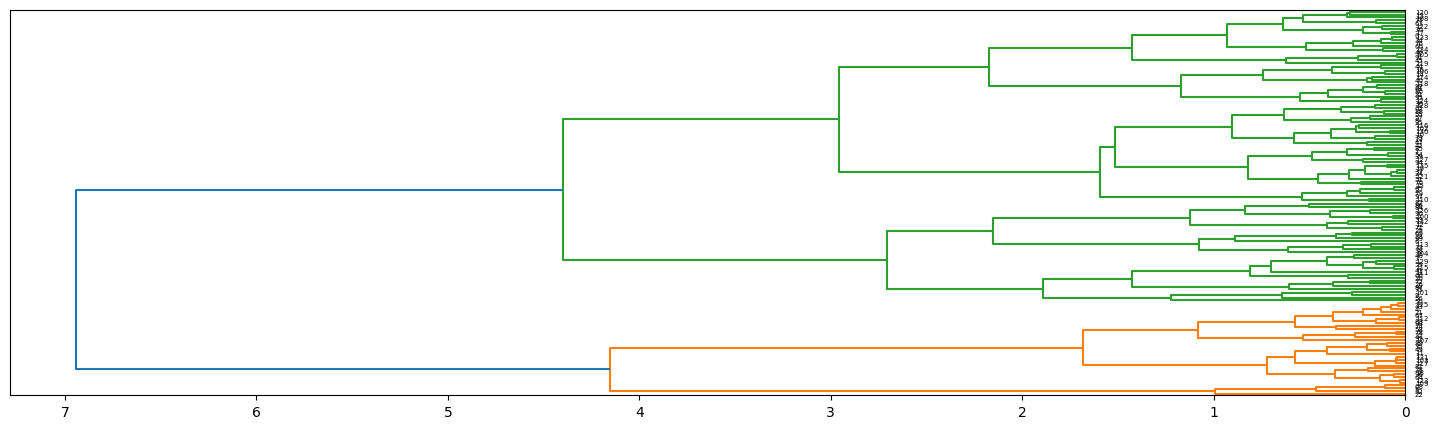

In [105]:
"""using complete(max) method in which  The similarity of two clusters
 C1 and C2 is equal to the maximum of the similarity between points Pi and Pj such that Pi belongs to C1 and Pj belongs to C2"""

#dedogram plotting 
labels_complete=cluster_and_draw(reduced_pca_data, 'euclidean', 'complete', 6)

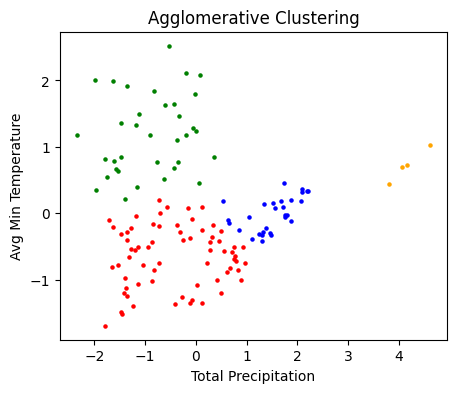

In [106]:
# plotting scatter plot of complete method 
create_scatterPlot(labels_complete)


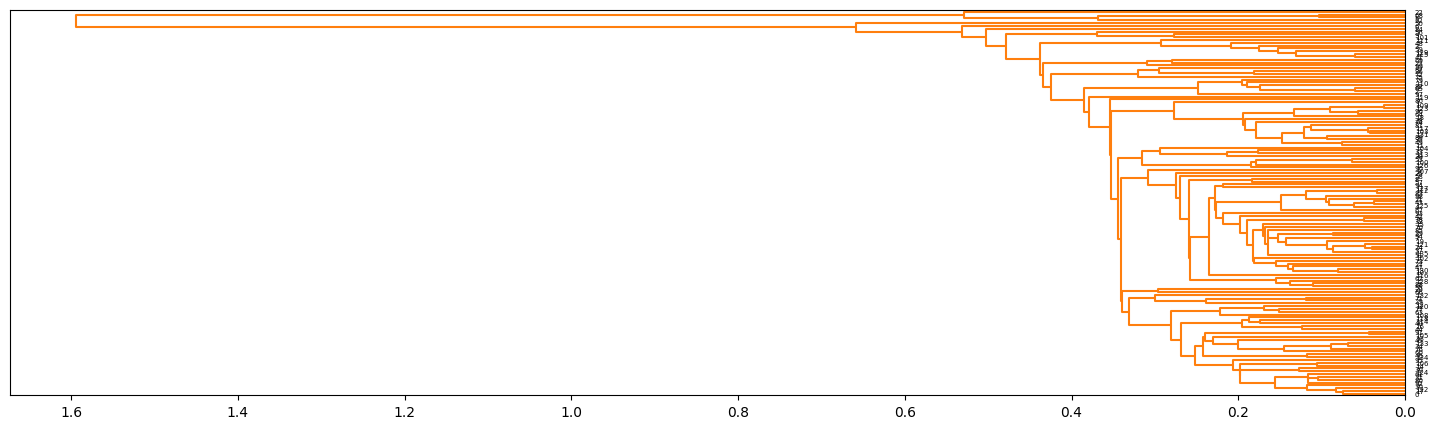

In [107]:
"""Single method is also called as min and here The similarity of two clusters C1 and C2 is equal to the 
minimum of the similarity between points Pi and Pj such that Pi belongs to C1 and Pj belongs to C2"""
labels_single=cluster_and_draw(reduced_pca_data, 'euclidean', 'single', 6)


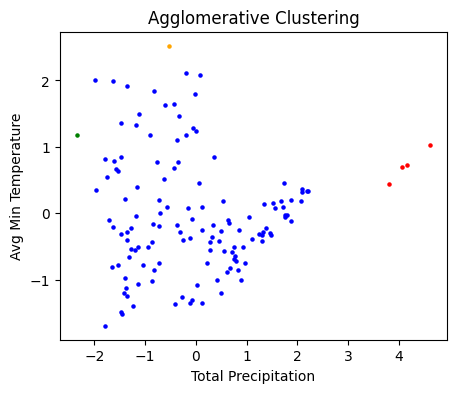

In [108]:
# plotting scatter plot of single method 
create_scatterPlot(labels_single)

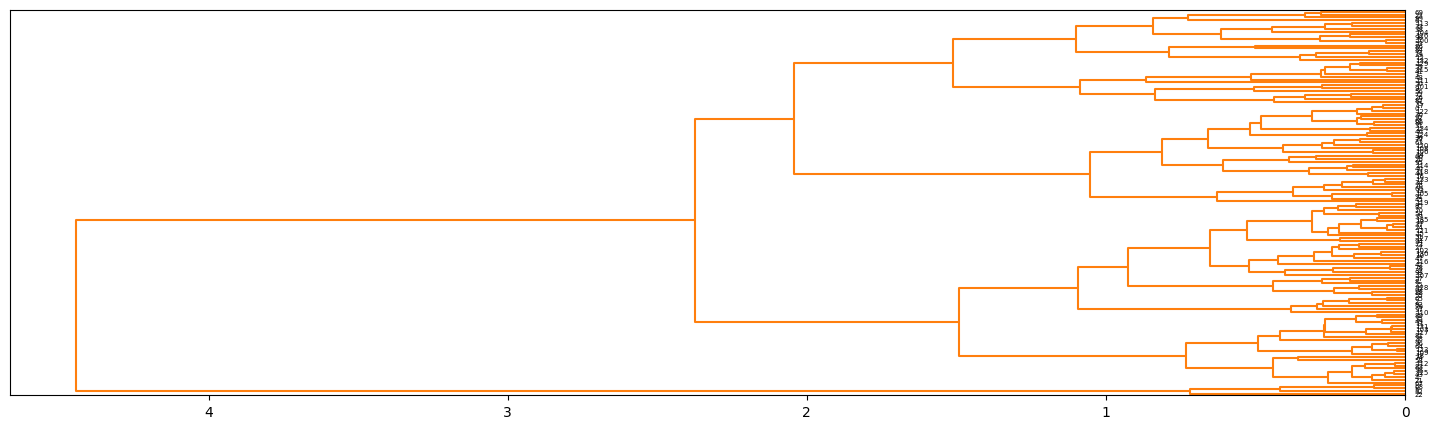

In [109]:
"""average method Take all the pairs of points and compute their similarities and calculate the average of the similarities."""
labels_average=cluster_and_draw(reduced_pca_data, 'euclidean', 'average', 6)

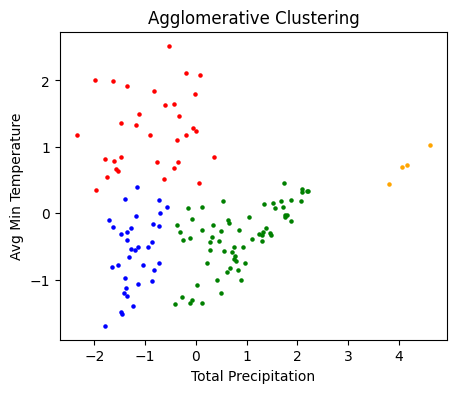

In [110]:
#plotting average method scatter plot 
create_scatterPlot(labels_average)

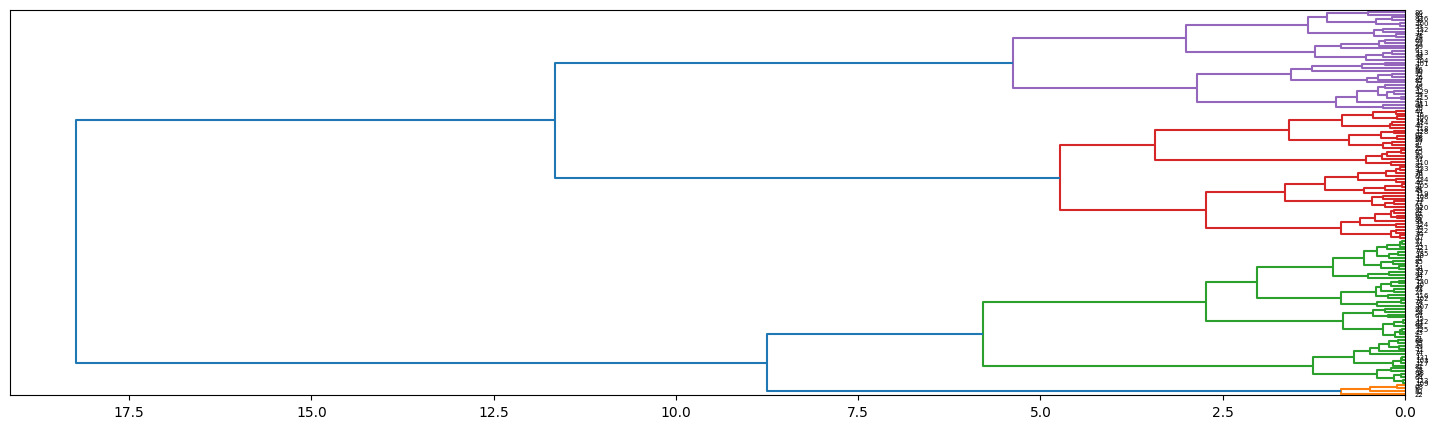

In [111]:
"""This approach of calculating the similarity between two clusters is exactly the same as Average except that Ward’s method calculates the sum of the square of the distances Pi and PJ."""
labels_ward=cluster_and_draw(reduced_pca_data, 'euclidean', 'ward', 6)

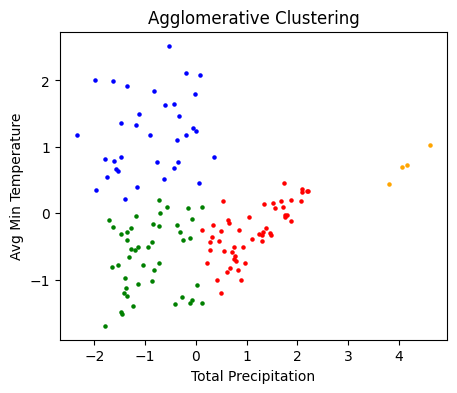

In [112]:
#plotting ward method 
create_scatterPlot(labels_ward)

Overall we will consider ward method over other as Ward’s method approach also does well in separating clusters if there is noise between clusters and the dendogram graph for this is much simpler and efficient

## Comparison of Distance Functions :
- Eucledian
- Manhatthan
- Cosine

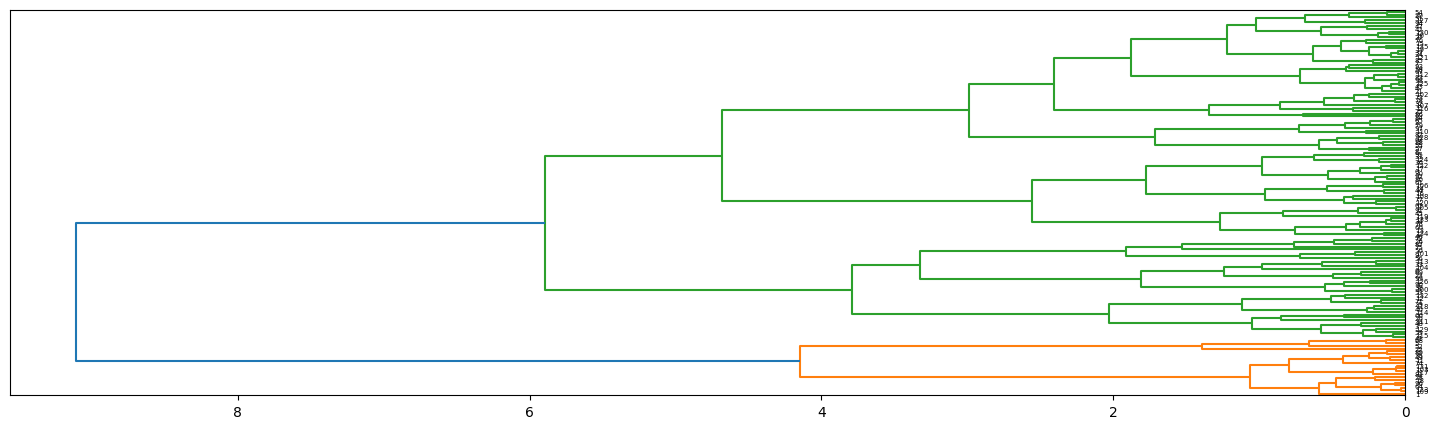

In [113]:
#using manhattan distance approach => summing the absolute differences along each dimension
labels_manhattan=cluster_and_draw(reduced_pca_data, 'manhattan', 'complete', 6)

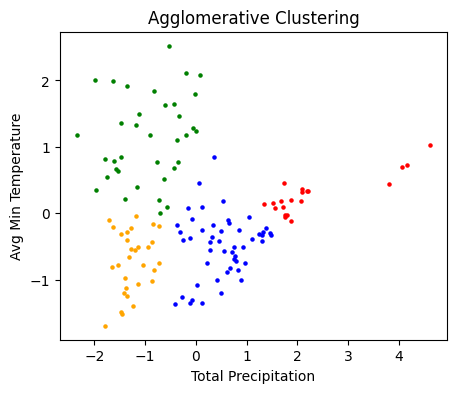

In [114]:
#creating scatter plot for manhattan distance 
create_scatterPlot(labels_manhattan)

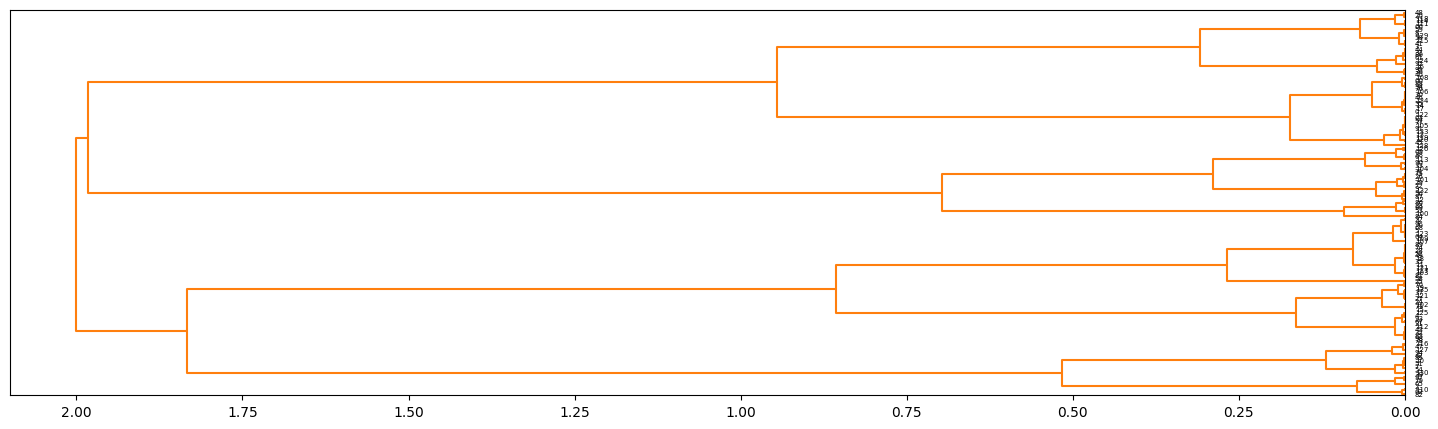

In [115]:
#using cosine method 
"""The cosine similarity or cosine distance is a measure used to determine the similarity between two non-zero vectors in an inner product space. It measures the cosine of the angle between the two vectors 
and ranges from -1 (opposite directions) to 1 (same direction), with 0 indicating orthogonality (perpendicular)."""
labels_cosine=cluster_and_draw(reduced_pca_data, 'cosine', 'complete', 6)

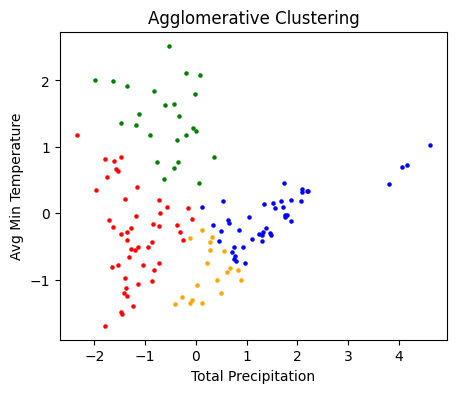

In [116]:
#plotting graph for cosine 
create_scatterPlot(labels_cosine)

Observation :
We can see that cosine and manhattan has yet different clusters but it does not properly separates the noise from our datasest like that done in euledian. 

Therefore for heirarchical clustering here in this study we will consider euledian and ward method 

### Advantages in Hierarchy 

-  Hierarchical clustering can perform well on smaller datasets

- It is less sensitive to the presence of outliers compared to other clustering methods, especially when using linkage methods like average linkage or Ward's method

### Limitations in Hierarchy 
- All the approaches to calculate the similarity between clusters has its own disadvantages.

- There is no mathematical objective for Hierarchical clustering.


<div class="alert alert-block alert-success">
<b>Task 8 – Conclusions and Future Work</b> 
</div>

Overall we can predict that our cluster has successfully divided the data points on the basis of rainfall pattern and temperature pattern and the cotton production of that region with year. 

We have a dataset in which climate condition of rainfall and temperature was given and commodity cotton was given. 

By performing Kmeans Clustering we came to divide the states on year basis with 4 clusters and having greater to smaller level of rainfall and cotton production. 

By performing Herirachical Clustering we came to divide the states on year basis with 4 cluster but this time with an outlier state which does not belong to other cluster thus efficiently detecting the outlier. 

kmeans year wise mazimum data in cluster :
 
1. Cluster 1 consists the year 2007 with 3 data points 

2. Cluster 2 consists the year 2014 with 7 data points

3. Cluster 3 consists the year 2008 with 5 data points

4. Cluster 4 consists the year 2011 with 7 data points 

Heirarchical year wise maximum data in cluster:

1. Cluster 1 consists the year 2008 with 7 data points

2. Cluster 2 consists the year 2008 with 5 data points

3. Cluster 3 consists the year 2007 with 6 data points 

4. Cluster 4 consists the year 2007 with 1 data point  

Now if we check the year wise rainfall we have observed before in our visualization that the years which have highest rainfall were 
2007 and 2008 has mazimum rainfall along with 2010 and 2011. 
2014 has very minimum rainfall. 

Thus in kmeans cluster the cluster 2 must consists of states which has mostly less cotton production due to less rainfall 
and cluster 1,3,4 must consists of states which has higher cotton production due to  higher rainfall. 
But this is not completely reflected in our clusters of kmeans 

In herarichical year wise separation is not that visible this means it has taken rainfall and temperature more into consideration. 

We can say from this that time pattern is not significantly divided in our clustering but rainfall and temperature does. 

If we look in our clustering we can see those regions which require more water for good cotton production and those region follows a trend. 

This can help us for further learning of commodities production on the basis of climatic condition such as rainfall 

Although our clustering has not come out perfect but we can say that data points with higher rainfall are grouped together and noise which do not follow any trend are separated in an another cluster. 

We can conclude our study by highlighting that clustering is not always precise and we do not know our results are true or not, but since this matches to the visualization pattern then we can justify our clustering method. 

I have chosen KMeans clustering and herarichical methods in this study because first kmeans works well with high dimensional spaces and herirachical with outliers. 

For future work we can involve more features adding provided area for production, chemicals, water deficiency and the features which we have not taken here as these are man handled features. We can expand our study on these features and see changes in cotton production. 

Our clustering can help in detecting the region in a certain year with higher cotton production compared to other and then its subsequent reason of rainfall amd temperature. 

<div class="alert alert-block alert-warning">
<b>End of file</b> 
</div>